Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option("display.max_columns", None)

In [3]:
# "D:\[CB] Data Science Master Course zip files\5.Challenge-House price prediction" path to find file.

# path = "/content/Houseprice_Data.csv"
data = pd.read_csv("Houseprice_Data.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1100, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1100 non-null   int64  
 1   MSSubClass     1100 non-null   int64  
 2   MSZoning       1100 non-null   object 
 3   LotFrontage    908 non-null    float64
 4   LotArea        1100 non-null   int64  
 5   Street         1100 non-null   object 
 6   Alley          69 non-null     object 
 7   LotShape       1100 non-null   object 
 8   LandContour    1100 non-null   object 
 9   Utilities      1100 non-null   object 
 10  LotConfig      1100 non-null   object 
 11  LandSlope      1100 non-null   object 
 12  Neighborhood   1100 non-null   object 
 13  Condition1     1100 non-null   object 
 14  Condition2     1100 non-null   object 
 15  BldgType       1100 non-null   object 
 16  HouseStyle     1100 non-null   object 
 17  OverallQual    1100 non-null   int64  
 18  OverallC

# EDA

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1100.000000,1100.000000,908.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1094.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1039.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,57.259091,69.618943,10573.819091,6.113636,5.566364,1971.689091,1985.206364,106.348263,442.231818,47.834545,565.604545,1055.670909,1159.241818,342.127273,6.713636,1508.082727,0.425455,0.061818,1.563636,0.383636,2.856364,1.047273,6.497273,0.608182,1978.687199,1.763636,472.692727,96.574545,46.388182,21.412727,3.562727,14.997273,1.054545,42.858182,6.270909,2007.826364,181253.129091
std,317.686953,42.772024,23.103290,10970.424090,1.385219,1.110032,29.881624,20.430716,183.609665,437.841504,163.760883,445.434880,423.772864,376.726501,434.279829,52.458596,509.574848,0.521501,0.248373,0.548424,0.497588,0.824613,0.224808,1.618532,0.644234,24.635402,0.739221,209.851653,124.686164,66.025027,60.248746,30.183435,54.794936,24.889651,501.964938,2.674870,1.326511,79584.698625
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,275.750000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,217.750000,795.750000,882.000000,0.000000,0.000000,1125.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,550.500000,50.000000,70.000000,9423.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,469.000000,1004.000000,1088.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,825.250000,70.000000,80.000000,11618.250000,7.000000,6.000000,2001.000000,2004.000000,169.750000,713.250000,0.000000,806.000000,1302.500000,1390.250000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,169.250000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1100.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1474.000000,2336.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


**Missing values**

In [8]:
features_with_nan = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_nan:
  print(feature, "has",  np.round(data[feature].isnull().mean(), 4) , "% of missing values")

LotFrontage has 0.1745 % of missing values
Alley has 0.9373 % of missing values
MasVnrType has 0.5891 % of missing values
MasVnrArea has 0.0055 % of missing values
BsmtQual has 0.0282 % of missing values
BsmtCond has 0.0282 % of missing values
BsmtExposure has 0.0291 % of missing values
BsmtFinType1 has 0.0282 % of missing values
BsmtFinType2 has 0.0291 % of missing values
FireplaceQu has 0.4764 % of missing values
GarageType has 0.0555 % of missing values
GarageYrBlt has 0.0555 % of missing values
GarageFinish has 0.0555 % of missing values
GarageQual has 0.0555 % of missing values
GarageCond has 0.0555 % of missing values
PoolQC has 0.9982 % of missing values
Fence has 0.8109 % of missing values
MiscFeature has 0.9582 % of missing values


SInce There are missing values so, we need to find out the relationship between missing values and sales price.

In [9]:
data.groupby('1stFlrSF')["SalePrice"].sum()

1stFlrSF
334      39300
372      55000
480      35311
483     593400
495     198500
         ...  
2515    200624
2524    278000
2898    287000
3138    184750
3228    430000
Name: SalePrice, Length: 645, dtype: int64

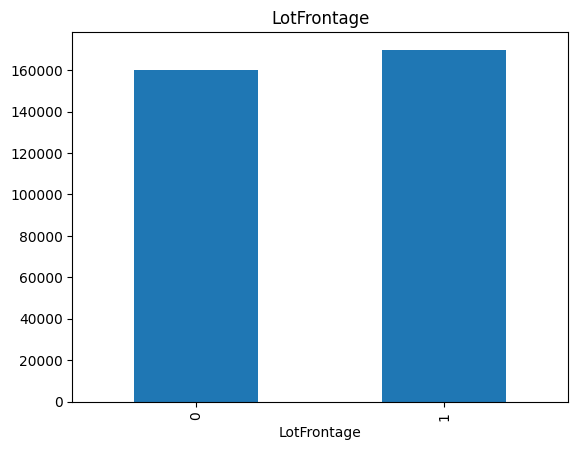

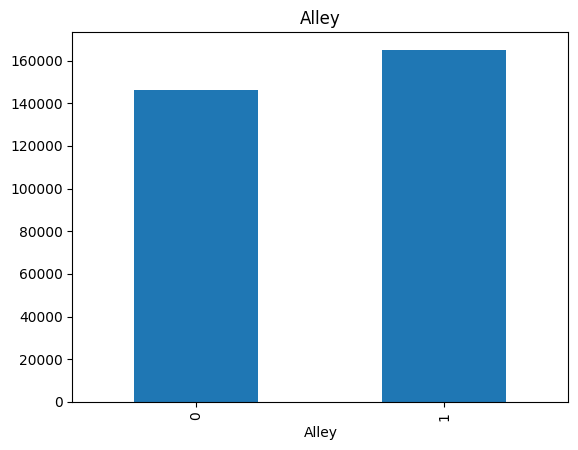

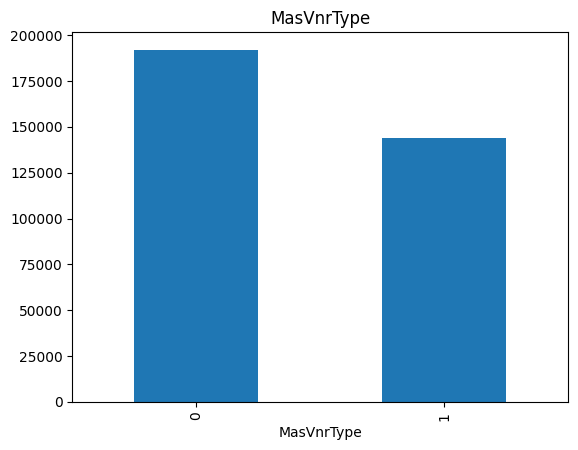

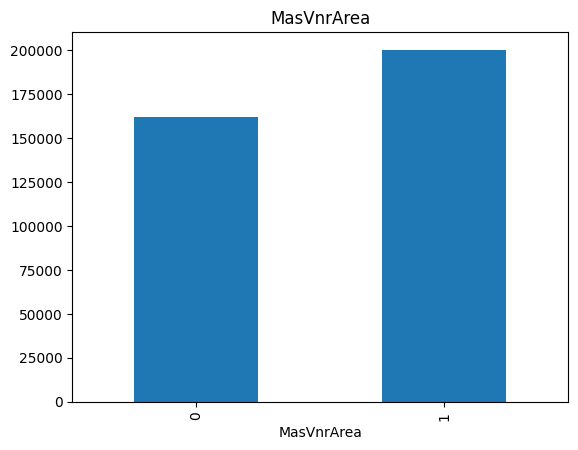

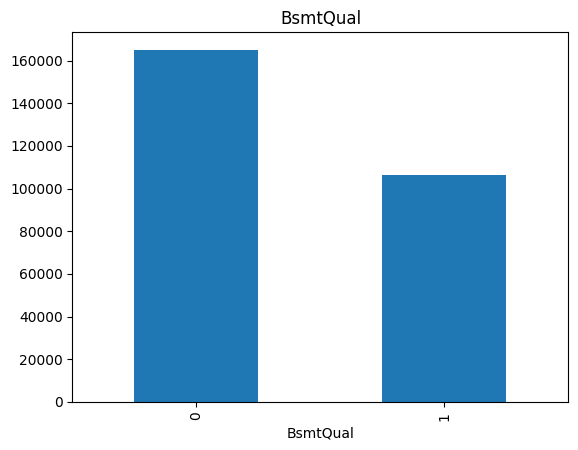

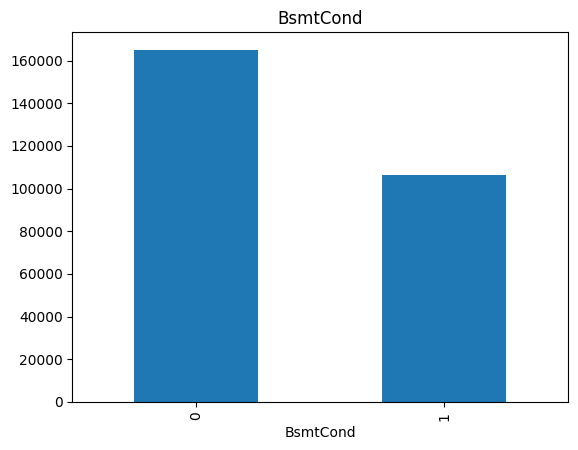

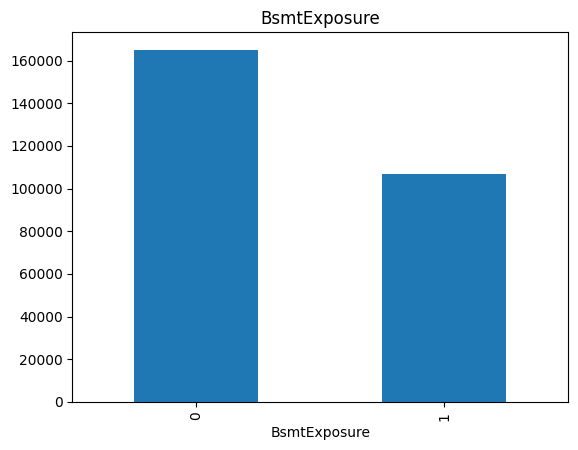

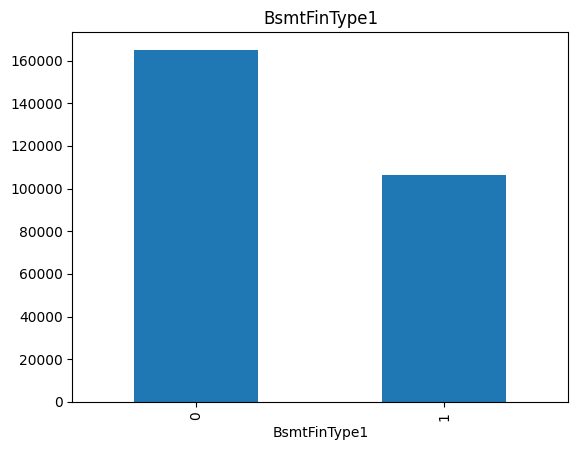

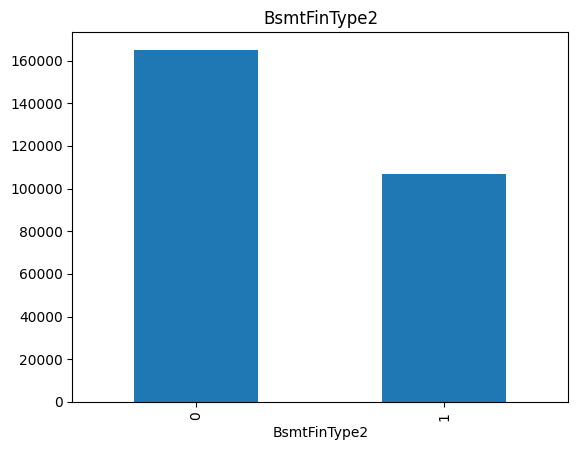

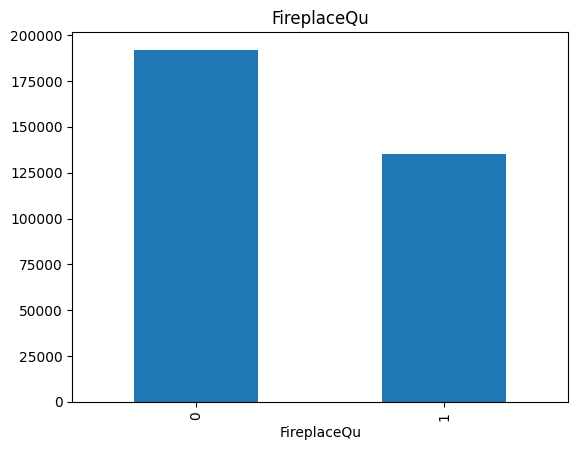

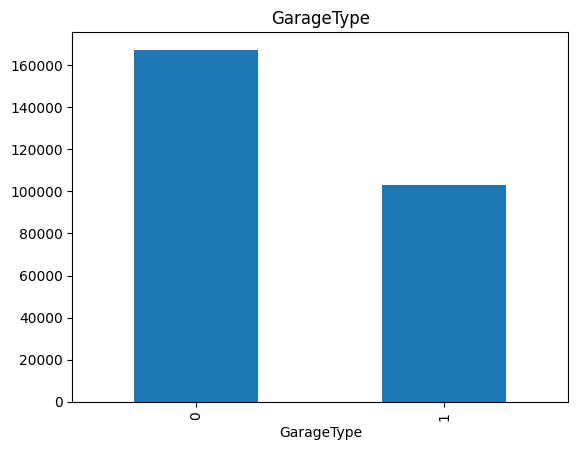

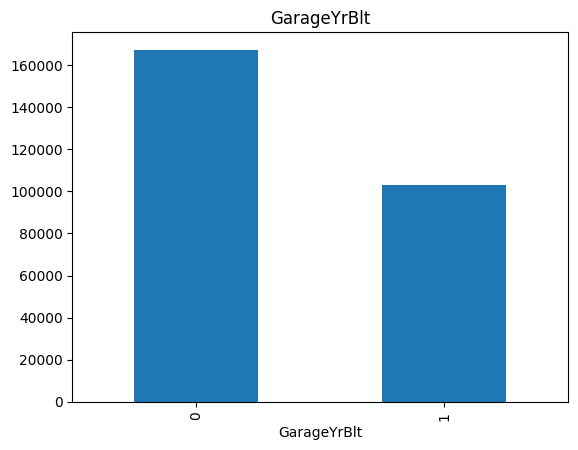

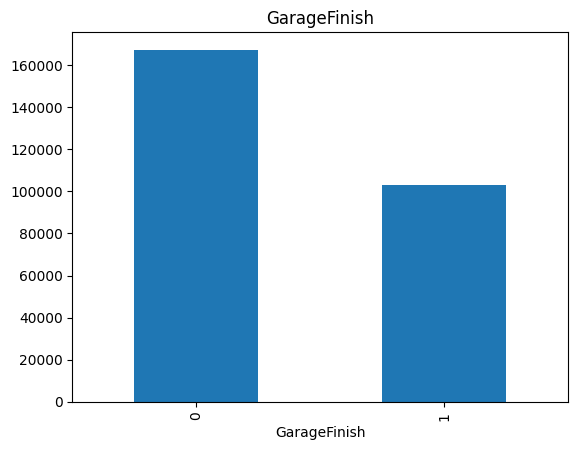

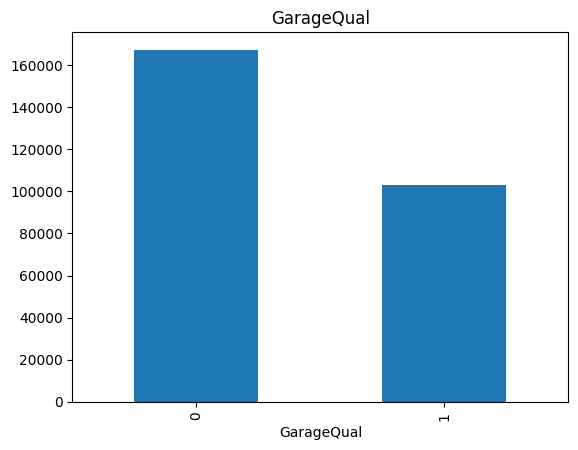

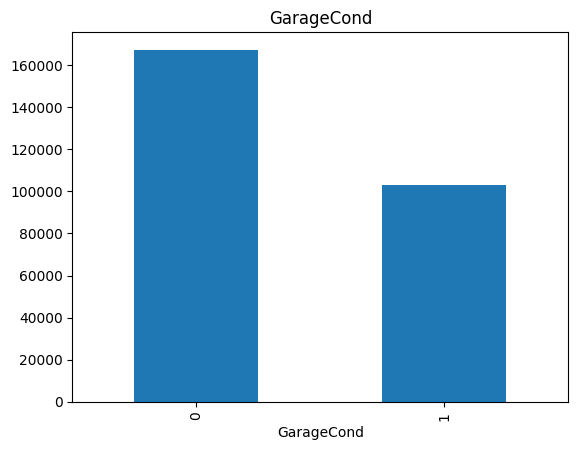

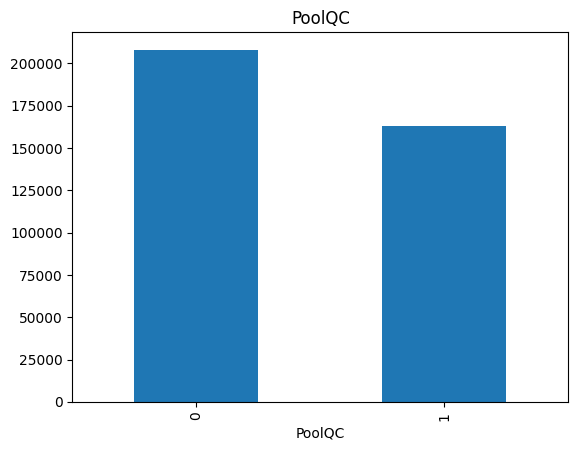

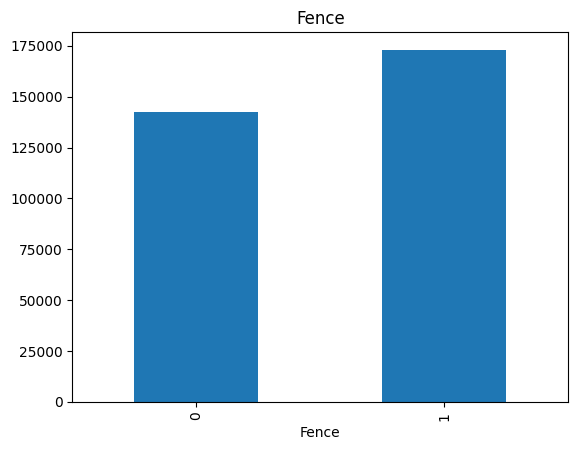

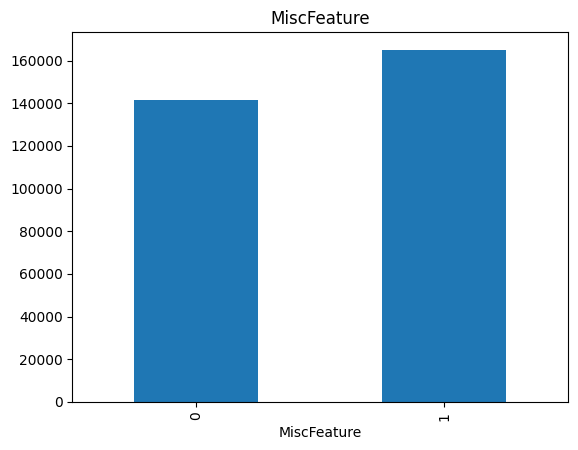

In [10]:
for feature in features_with_nan:
  df = data.copy()

  df[feature] = np.where(df[feature].isnull(), 1, 0)

  df.groupby(feature)["SalePrice"].median().plot.bar()
  plt.title(feature)
  plt.show()

Here the relation between the missing value and salesprice is clearly visible.
for example,
- The properties with missing LotFrontage tend to have slightly higher median sale prices.
- The properties with missing Alley data have a higher median sale price.
- The absence of information about basements may be more common in lower-priced properties.

**Numerical Variables**

In [11]:
num_features = [features for features in data.columns if data[features].dtype != "O" and features not in "Id"]
print("The length of Numerical features is", len(num_features))

data[num_features].head()

The length of Numerical features is 37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


DateTime Variable

In [12]:
year_features = [feature for feature in num_features if "Yr" in feature or "Year" in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
for feature in year_features:
  print(feature,"\n", data[feature].unique())
  print(feature,"has", data[feature].nunique(), "values\n")

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882]
YearBuilt has 107 values

YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YearRemodAdd has 61 values

GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1

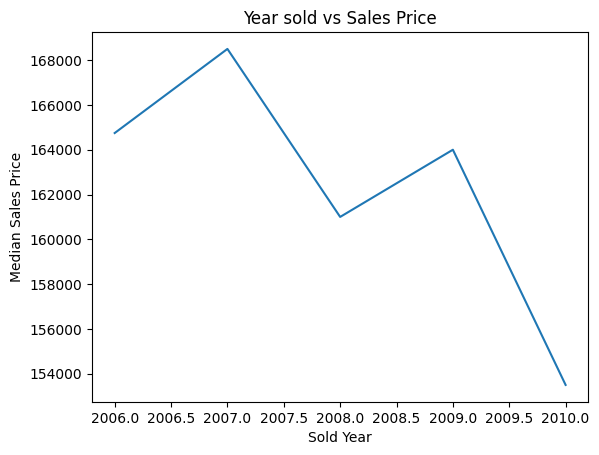

In [14]:
# Analyze YrSold with salesprice.

data.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Sold Year")
plt.ylabel("Median Sales Price")
plt.title("Year sold vs Sales Price")
plt.show()

Generally it is not possible that the price of a house decreases as years goes by. Both are kind of inversely proportional to each other.  

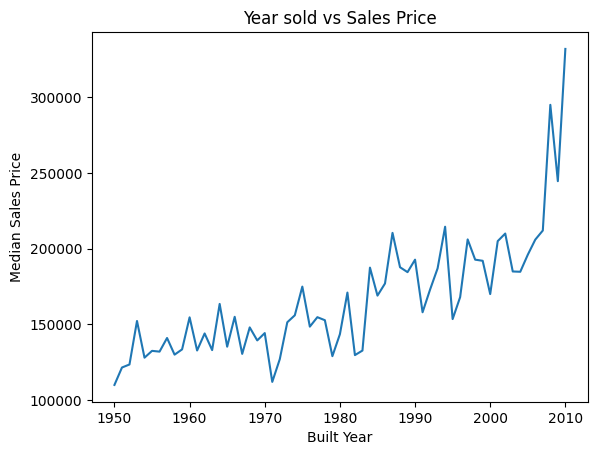

In [15]:
# Analyze YearRemodAdd  with salesprice.

data.groupby("YearRemodAdd")["SalePrice"].median().plot()
plt.xlabel("Built Year")
plt.ylabel("Median Sales Price")
plt.title("Year sold vs Sales Price")
plt.show()

The "YearRemodAdd" values represent the year of remodeling, and the corresponding median sale prices seem to show an upward trend over time.

- There is a noticeable increase in the median sale price starting from the 1950s and continuing through the 2000s, with some fluctuations(like after 1970 there is some decrement in medain sale price of a house).
- The highest median sale price is observed in the year 2010, suggesting that properties renovated in or around that year tend to have higher sale prices.

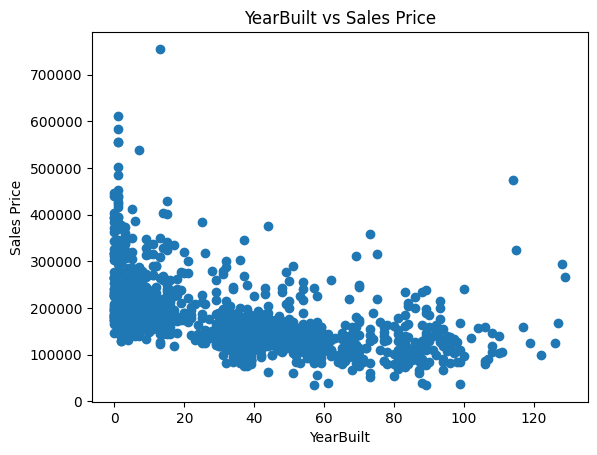

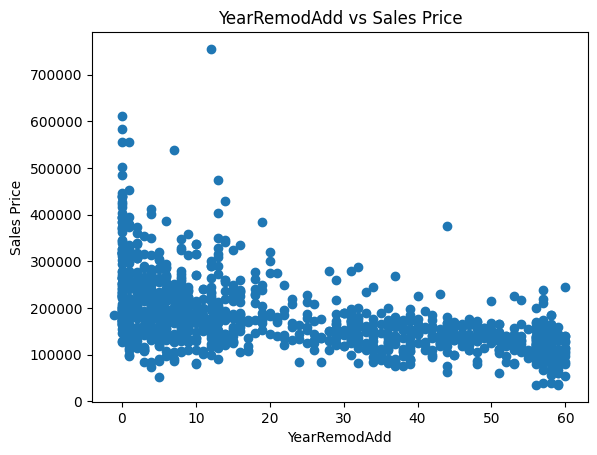

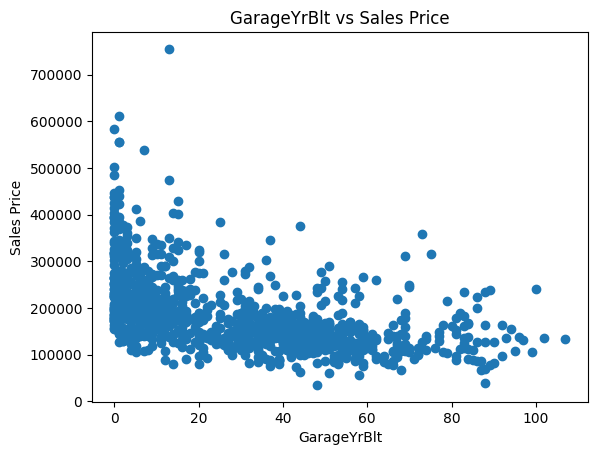

In [16]:
# Comparing the differnece between all the year features with the Sales price.

for feature in year_features:

  if feature != "YrSold":
    df = data.copy()


    df[feature] = df["YrSold"] - df[feature]
    plt.scatter(df[feature], df["SalePrice"])
    plt.title(f"{feature} vs Sales Price")
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.show()

The price of a newly built house is more than the price of an old one. Similarly, a house that was remodelled after 2005 has a higher sales price.

In [17]:
# Discrete variable in Numerical variable.

dis_features = [feature for feature in num_features if data[feature].nunique() < 25 and feature not in year_features]
print("Discrete variavle length is", len(dis_features))
dis_features

Discrete variavle length is 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
df.groupby("Fireplaces")["SalePrice"].median()

Fireplaces
0    135000.0
1    190000.0
2    200624.0
3    275000.0
Name: SalePrice, dtype: float64

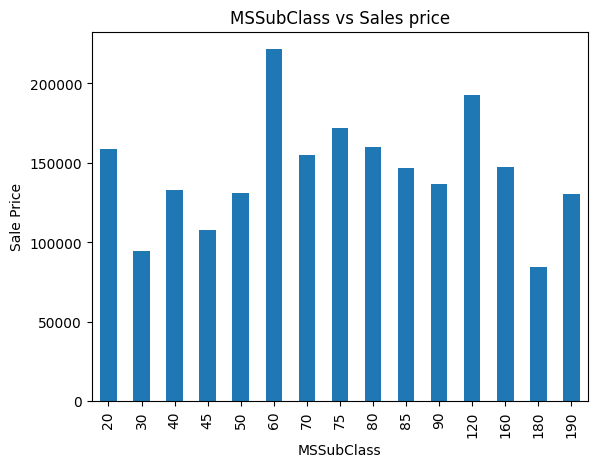

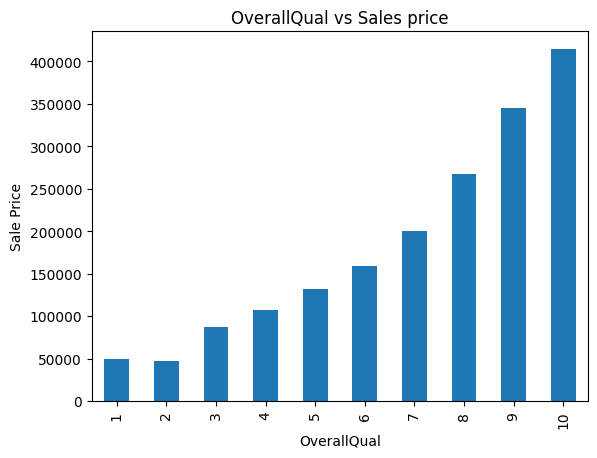

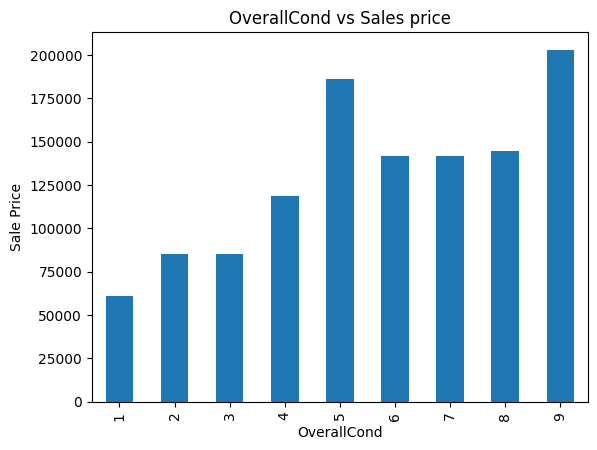

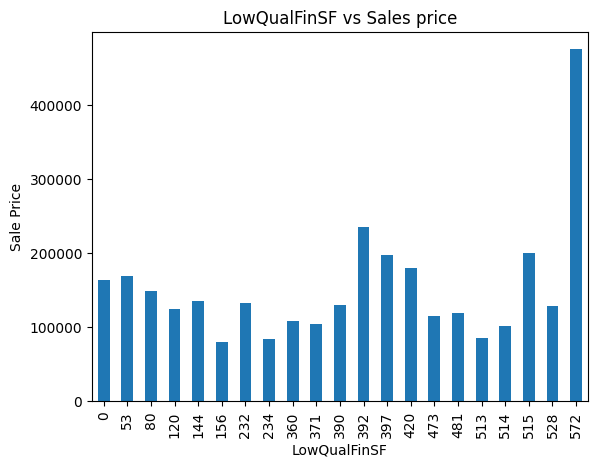

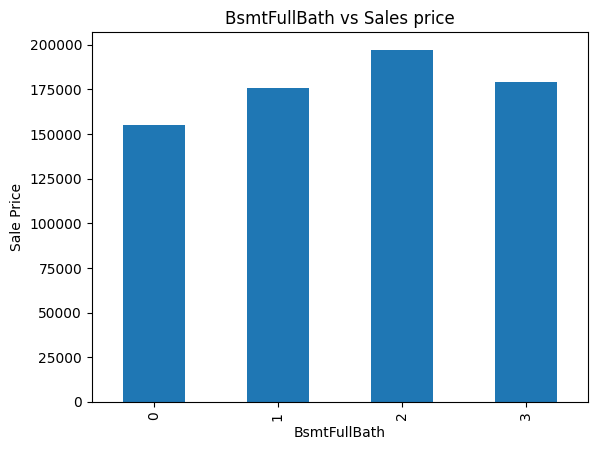

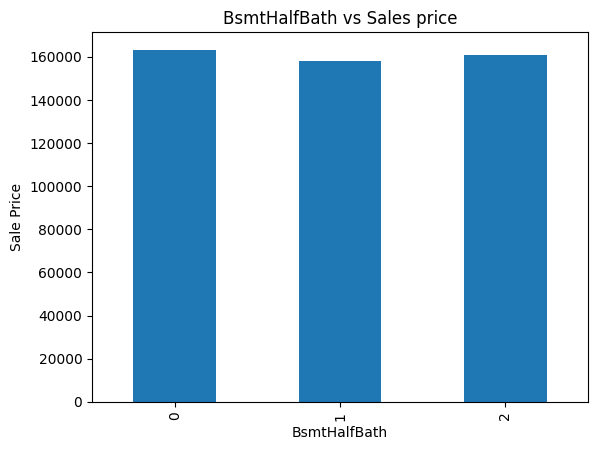

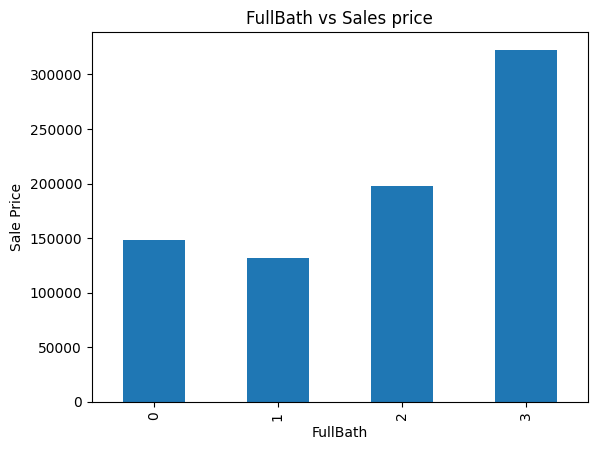

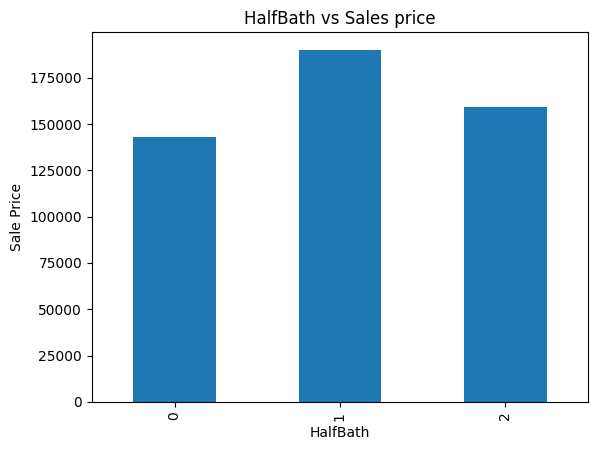

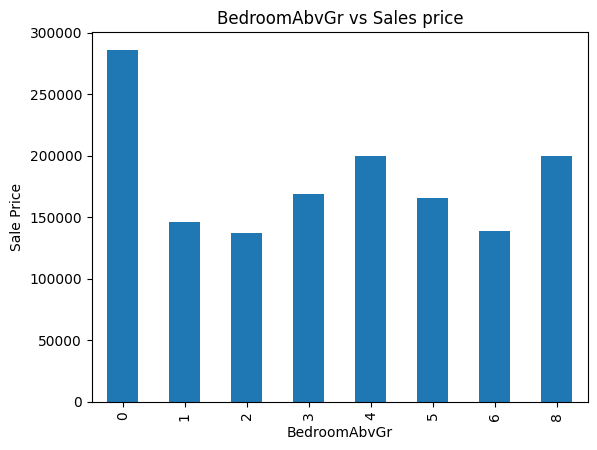

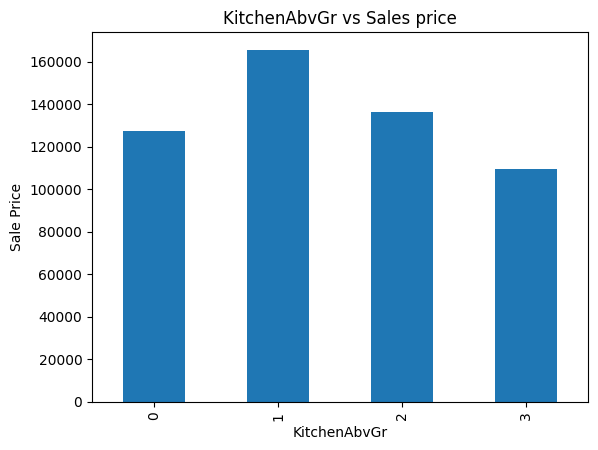

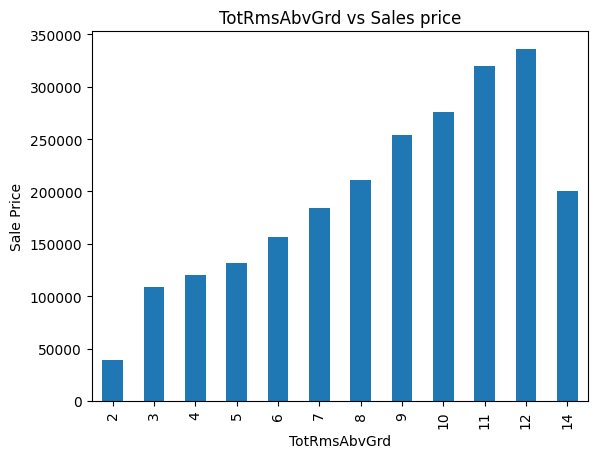

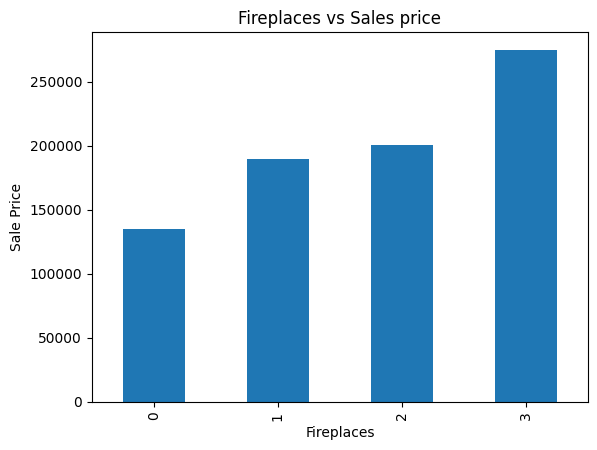

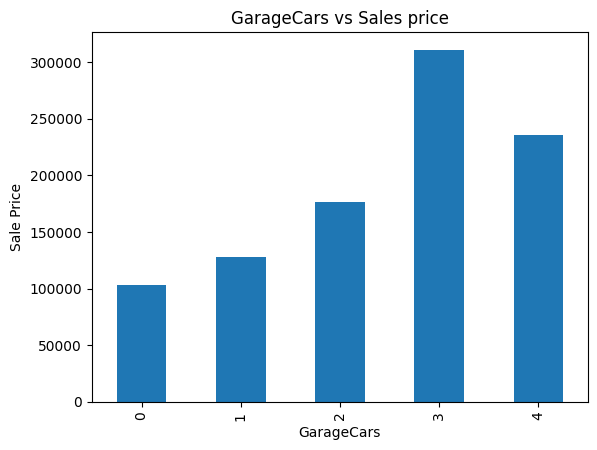

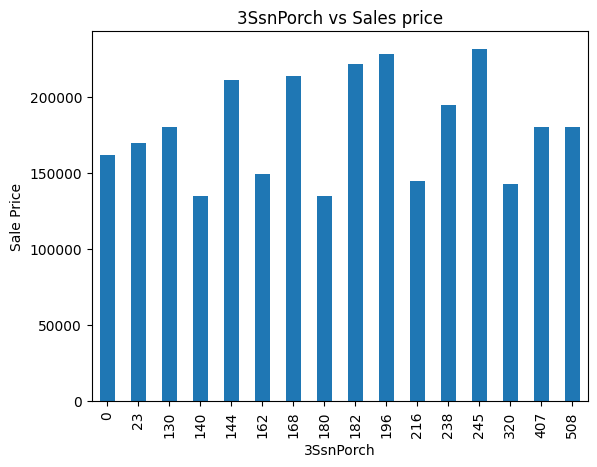

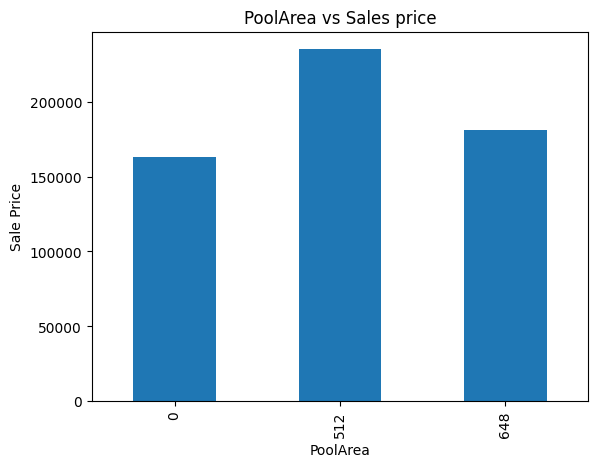

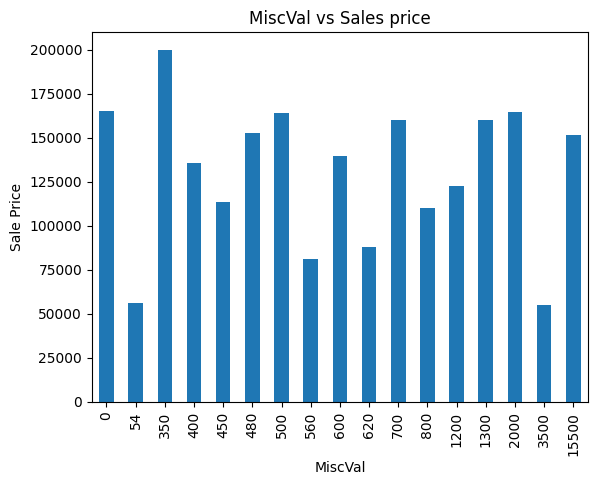

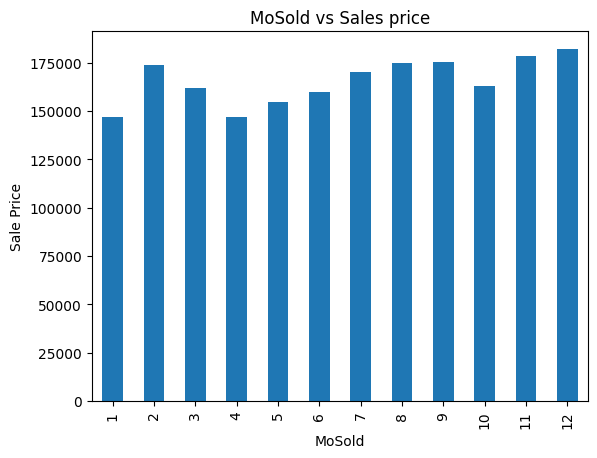

In [19]:
for feature in dis_features:

  df = data.copy()

  df.groupby(feature)["SalePrice"].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Sale Price")
  plt.title(f"{feature} vs Sales price")
  plt.show()

- The data clearly indicates that there is a strong positive correlation between the overall quality rating ("OverallQual") and the median sale price. As the overall quality rating increases, the median sale price tends to increase as well.
- The data suggests that there is a positive correlation between the overall condition rating ("OverallCond") and the median sale price.
-  The data suggests that there is a correlation between the number of fireplaces ("Fireplaces") and the median sale price.
- As the square footage of low-quality finished area increases, the median sale price tends to decrease. There are a few cases where the square footage of low-quality finished area is relatively high (e.g., 572, 392 square feet), but the median sale price is exceptionally high. Buyers generally prefer higher-quality finishes, and low-quality finishes can negatively impact a property's perceived value.

So, we can say that there is certain relationship of discrete variable with Sales price.

In [20]:
# For Continuous Variables

con_features = [feature for feature in num_features if feature not in dis_features+year_features]
print("The Length of continuous Variable is",len(con_features))
con_features

The Length of continuous Variable is 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

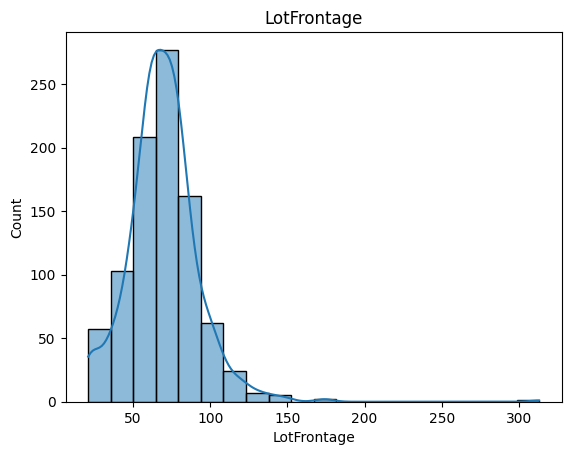

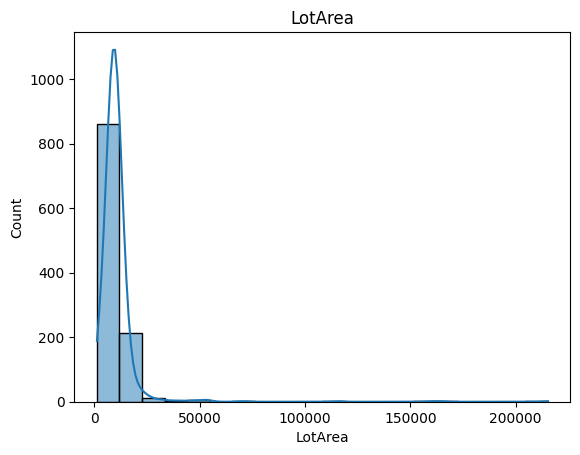

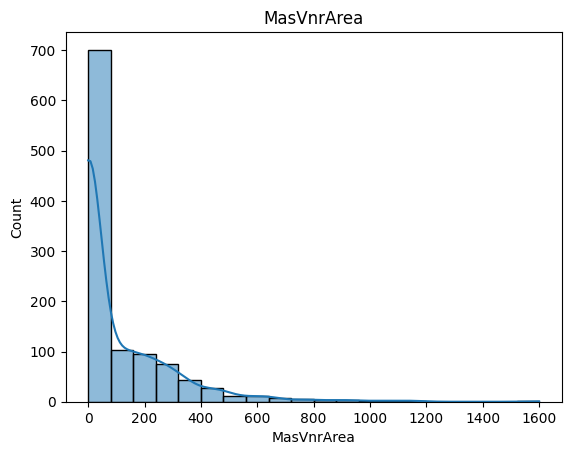

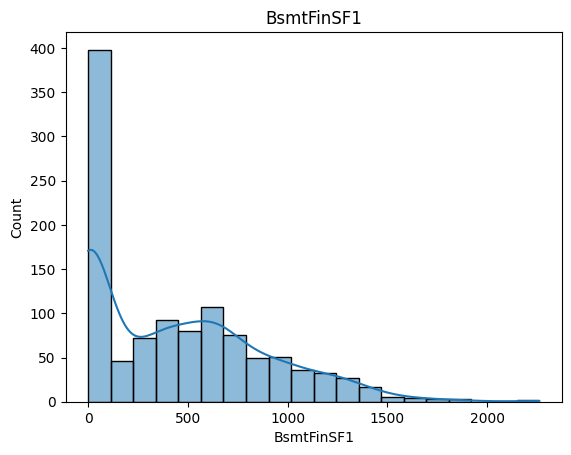

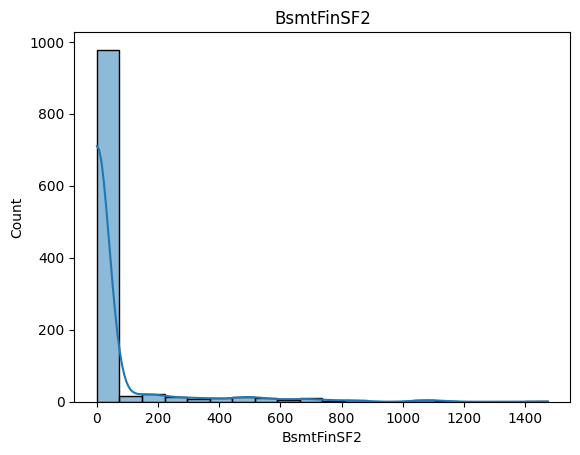

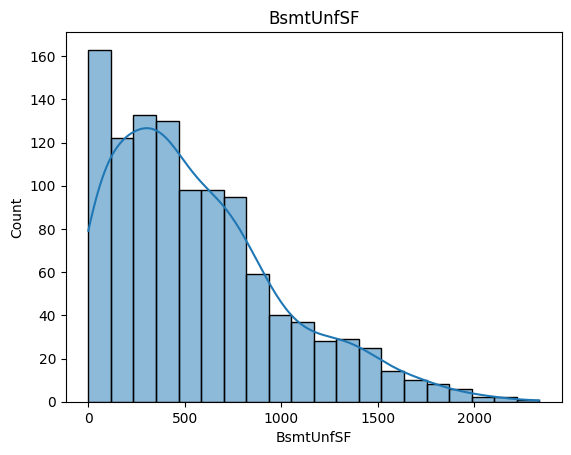

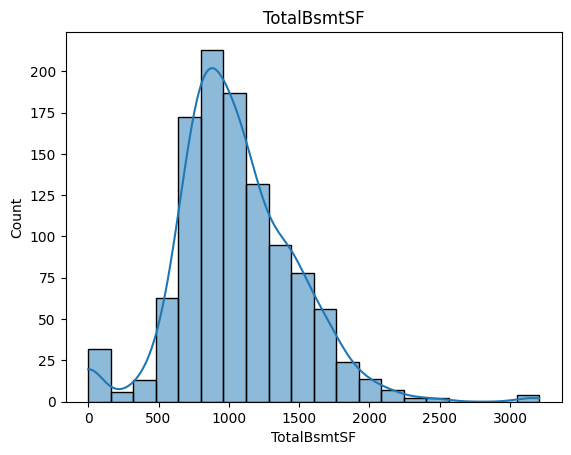

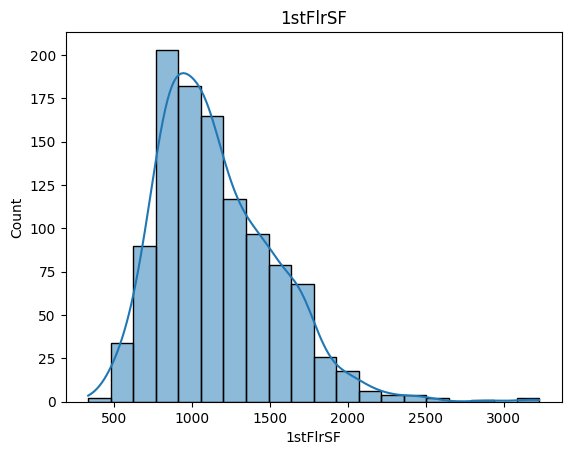

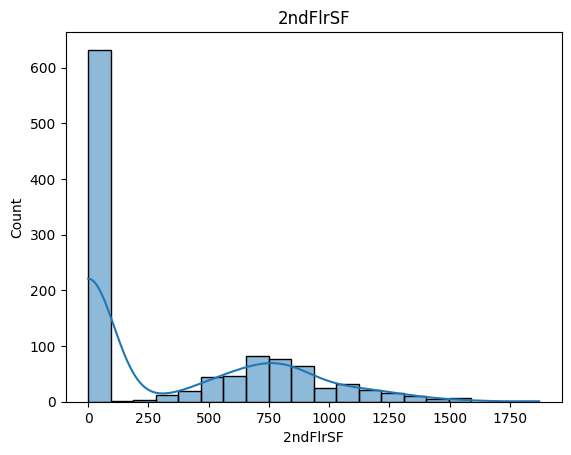

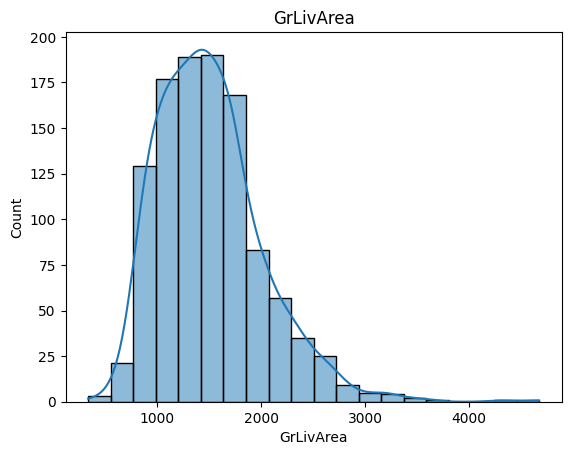

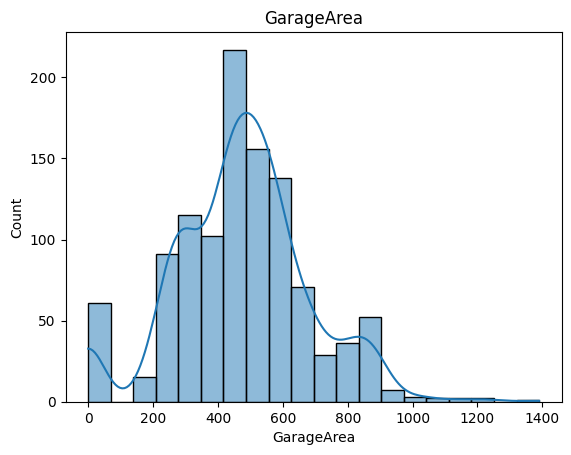

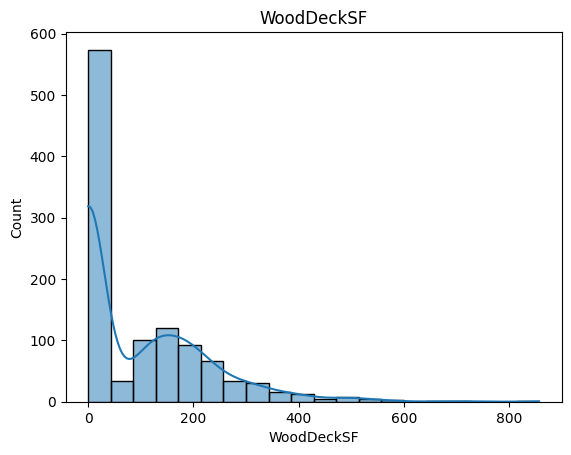

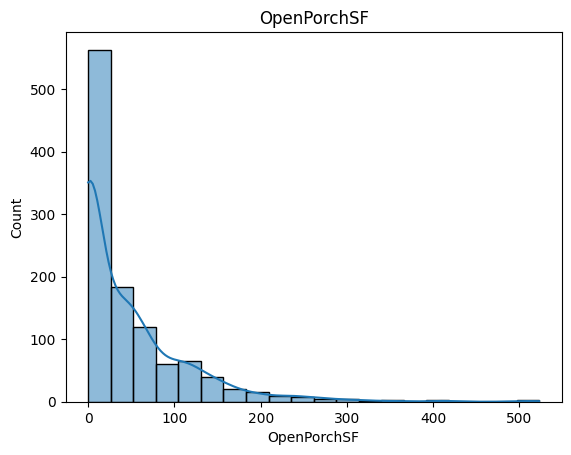

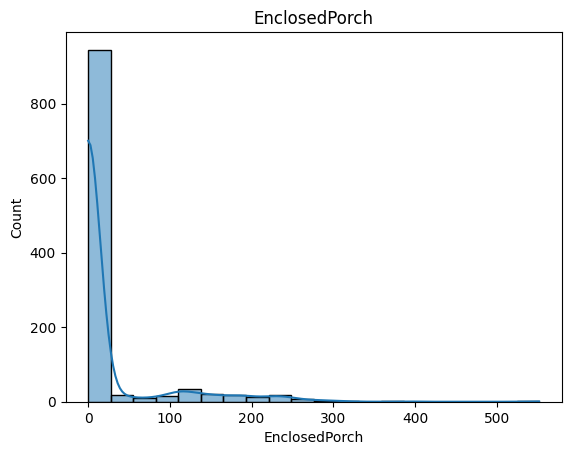

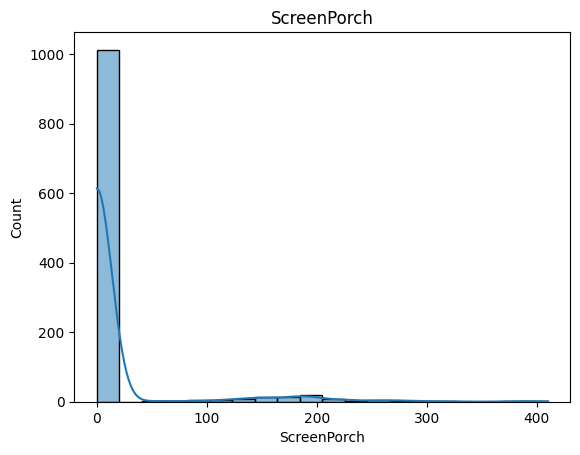

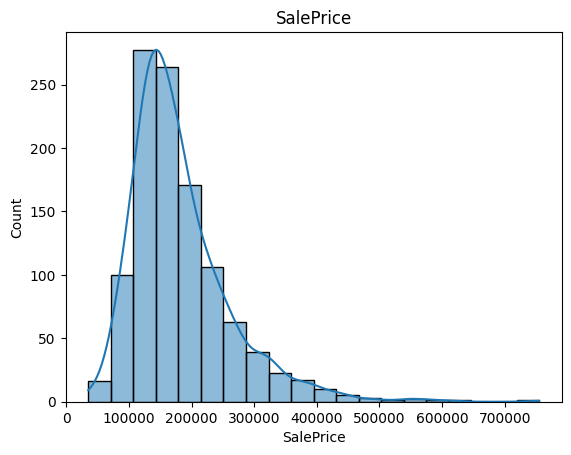

In [21]:
for feature in con_features:
  df = data.copy()

  sns.histplot(data[feature], bins = 20,kde=True)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

Some of the continuous features are clearly visible that they are skewed.

In [22]:
# Want to check skewness
# data["LotFrontage"].skew()

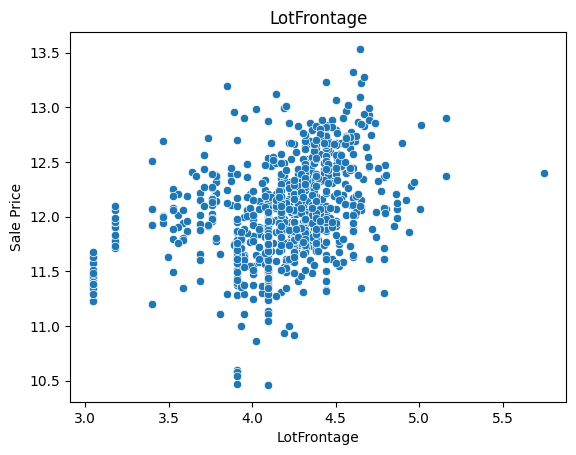

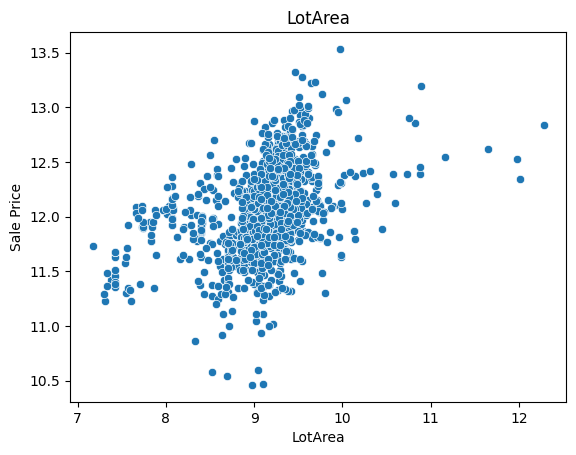

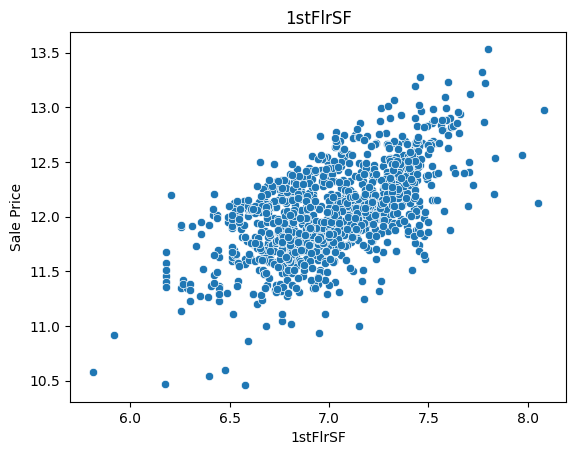

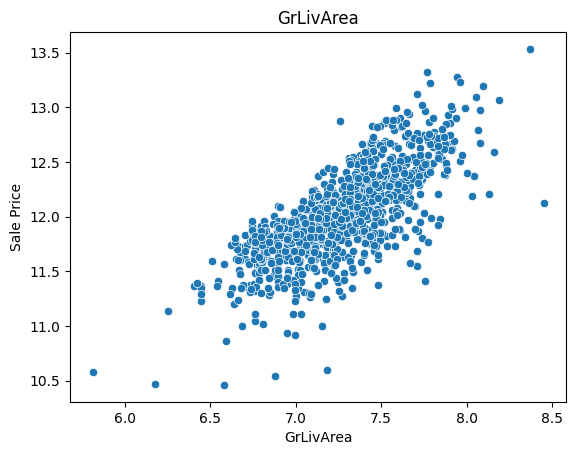

In [23]:
# So we are going to perform Logarithimic Transformation.

for feature in con_features:
  df = data.copy()

  if 0 in df[feature].unique():
    pass

  else:
    # Applying Log transformation on features
    df[feature] = np.log(df[feature])
    df["SalePrice"] = np.log(df["SalePrice"])

    # Now let's draw the scatter plot.
    if feature !="SalePrice":

      sns.scatterplot(x = df[feature], y = df["SalePrice"])
      plt.xlabel(feature)
      plt.ylabel("Sale Price")
      plt.title(feature)
      plt.show()

It is clearly visible that after applying logarithmic transformation there some continuous features that are showing positively correlation with sale price of a house.

Outliers

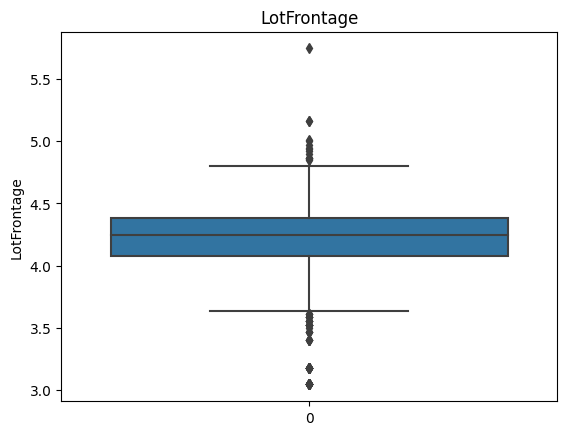

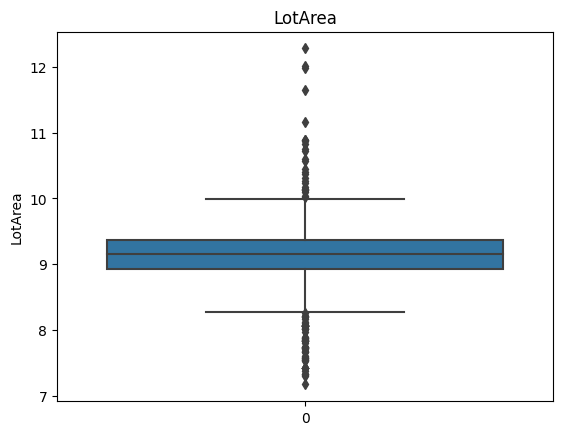

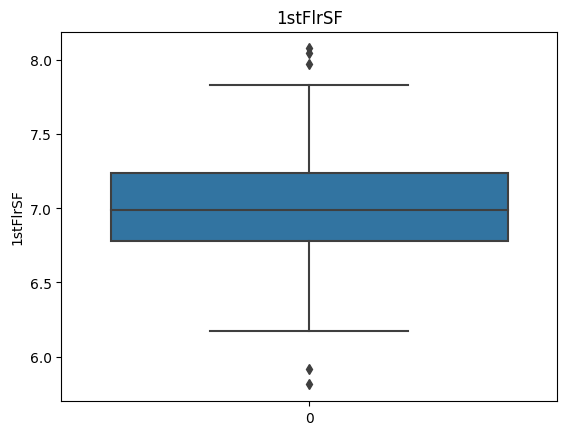

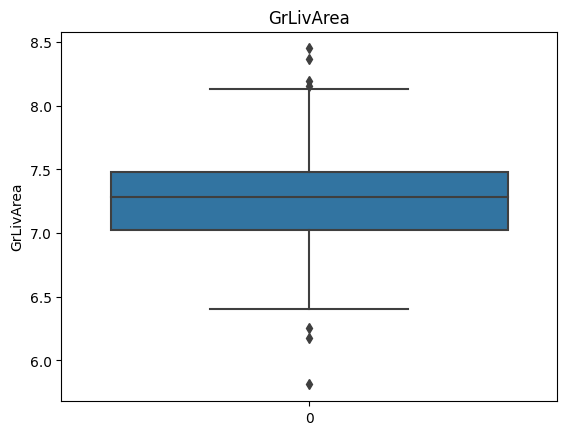

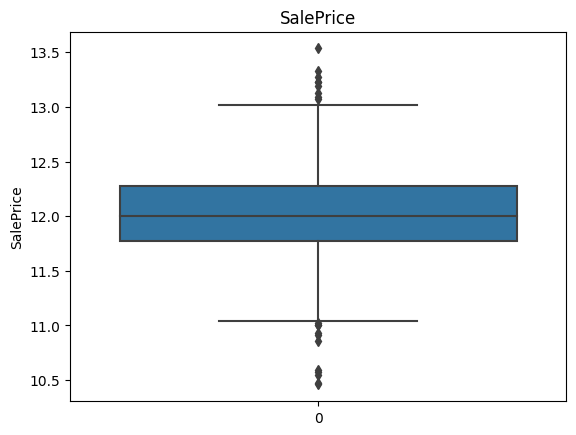

In [24]:
for feature in con_features:

  df = data.copy()

  if 0 in df[feature].unique():
    pass

  else:
    df[feature] = np.log(df[feature])

    sns.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

We have lot of Outliers in Continuous feature.

**Categorical Variables**



In [25]:
cat_features = [feature for feature in data.columns if data[feature].dtype == "O"]
print("Categorical Features Count:",len(cat_features))
cat_features

Categorical Features Count: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
data[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [27]:
# finding the categories count in each feature.

for feature in cat_features:

  print(f"{feature} has {data[feature].nunique()} categories.")

MSZoning has 5 categories.
Street has 2 categories.
Alley has 2 categories.
LotShape has 4 categories.
LandContour has 4 categories.
Utilities has 2 categories.
LotConfig has 5 categories.
LandSlope has 3 categories.
Neighborhood has 25 categories.
Condition1 has 9 categories.
Condition2 has 7 categories.
BldgType has 5 categories.
HouseStyle has 8 categories.
RoofStyle has 5 categories.
RoofMatl has 6 categories.
Exterior1st has 13 categories.
Exterior2nd has 15 categories.
MasVnrType has 3 categories.
ExterQual has 4 categories.
ExterCond has 5 categories.
Foundation has 6 categories.
BsmtQual has 4 categories.
BsmtCond has 4 categories.
BsmtExposure has 4 categories.
BsmtFinType1 has 6 categories.
BsmtFinType2 has 6 categories.
Heating has 4 categories.
HeatingQC has 5 categories.
CentralAir has 2 categories.
Electrical has 5 categories.
KitchenQual has 4 categories.
Functional has 7 categories.
FireplaceQu has 5 categories.
GarageType has 6 categories.
GarageFinish has 3 categories

In [28]:
df.groupby("Utilities")["SalePrice"].median()

Utilities
AllPub    12.001505
NoSeWa    11.831379
Name: SalePrice, dtype: float64

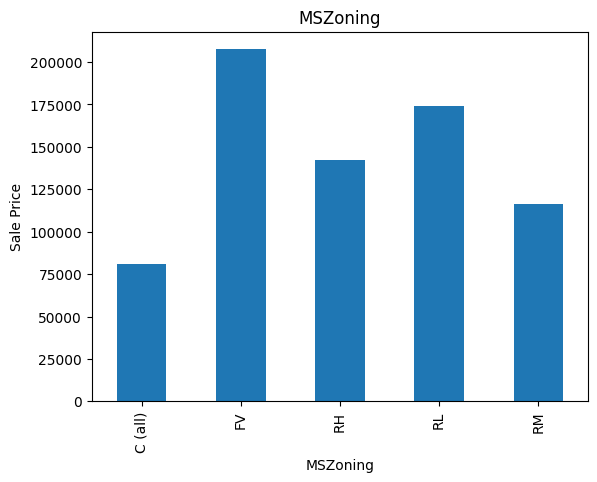

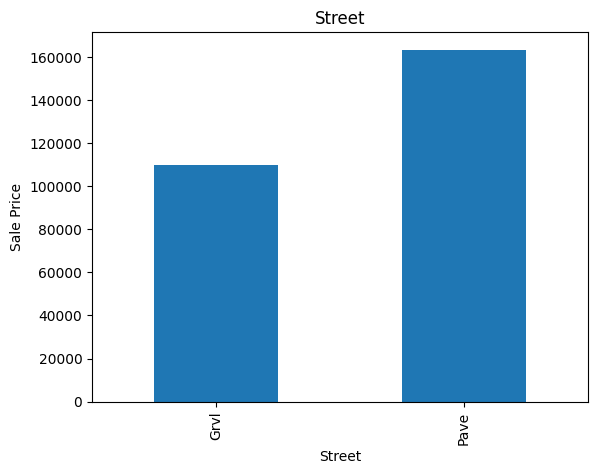

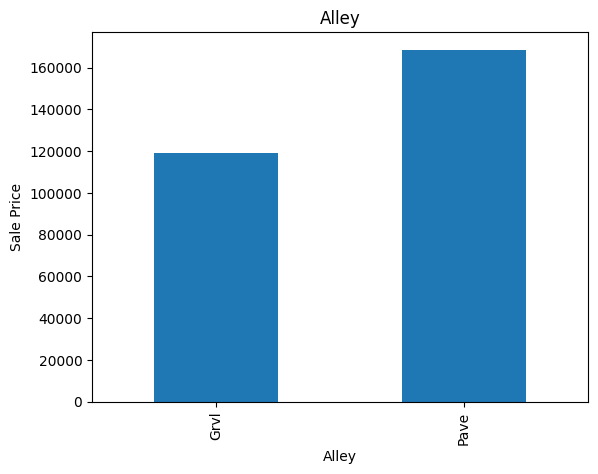

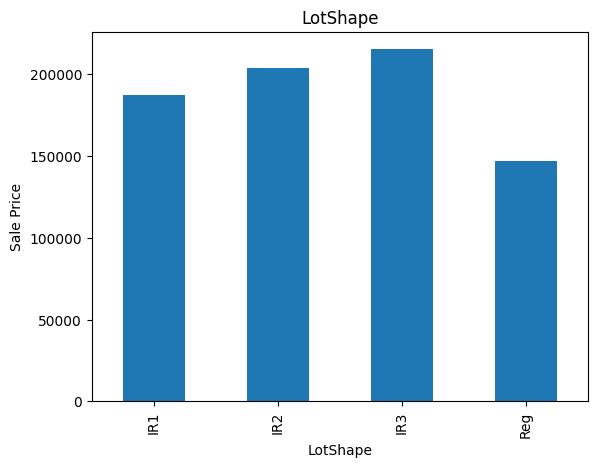

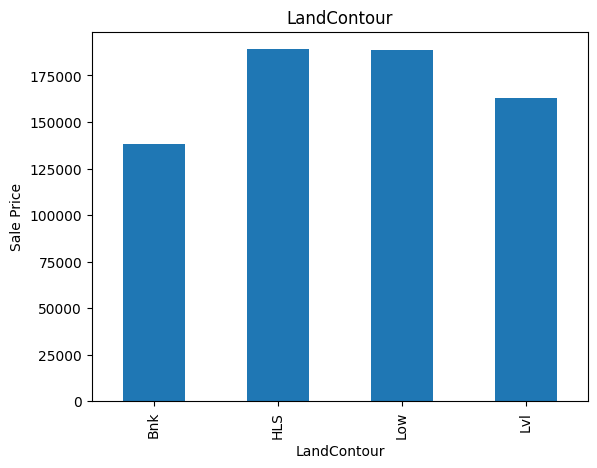

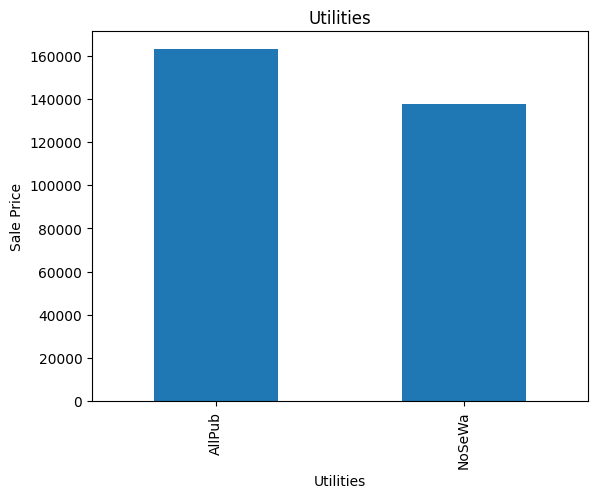

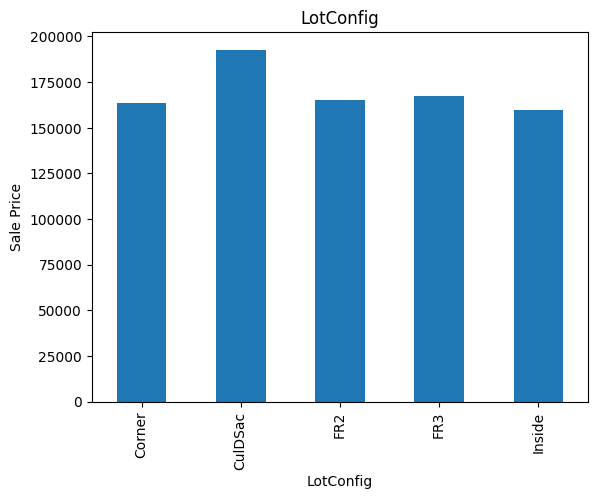

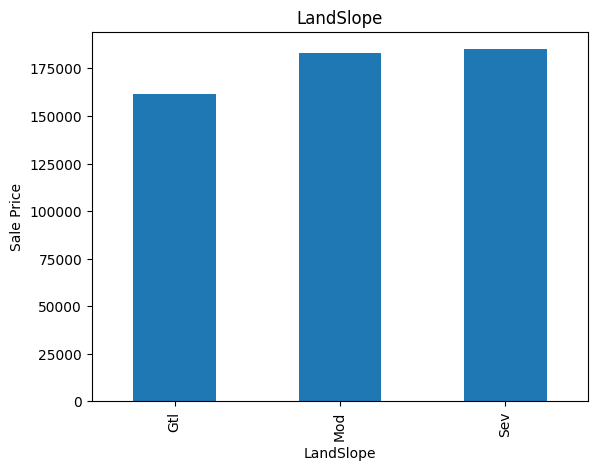

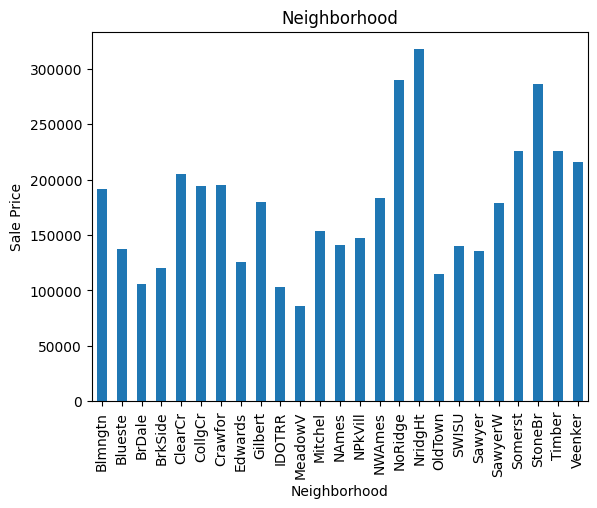

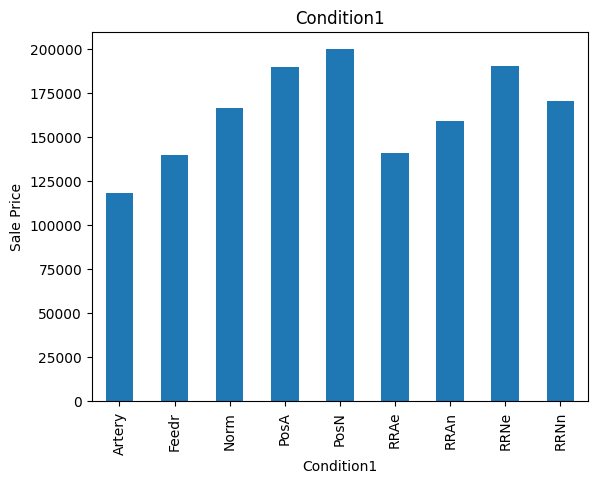

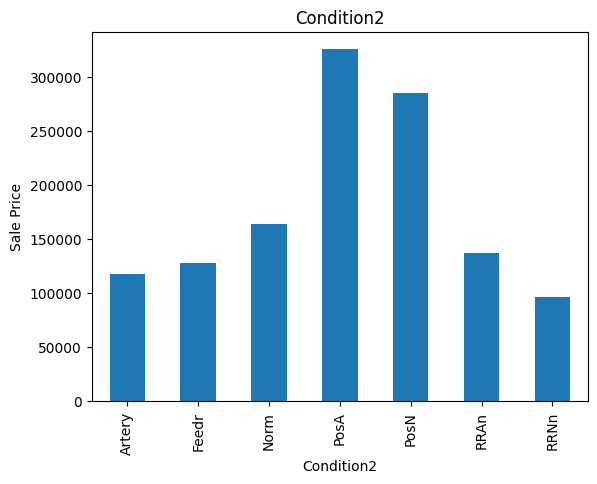

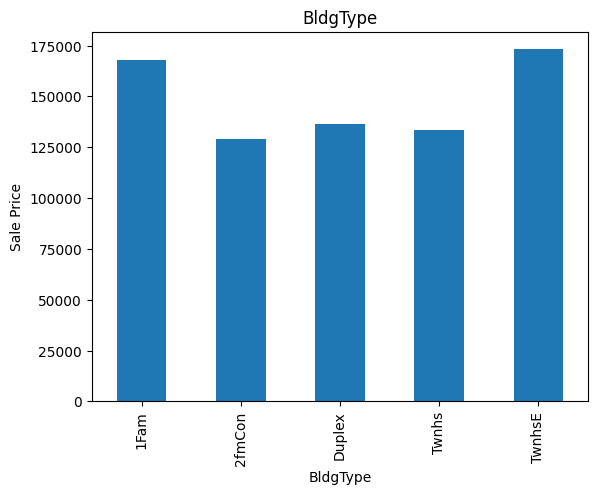

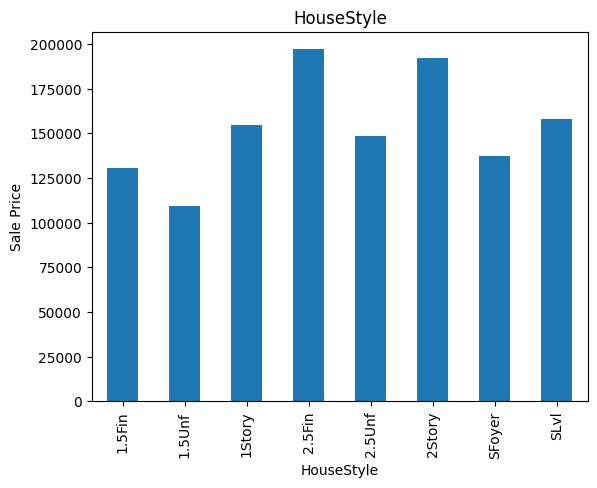

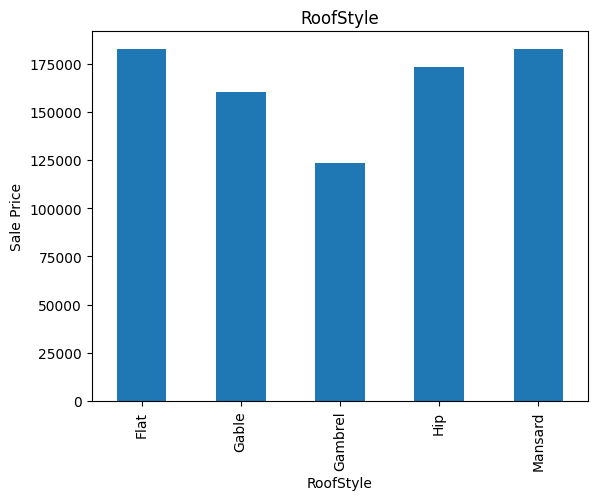

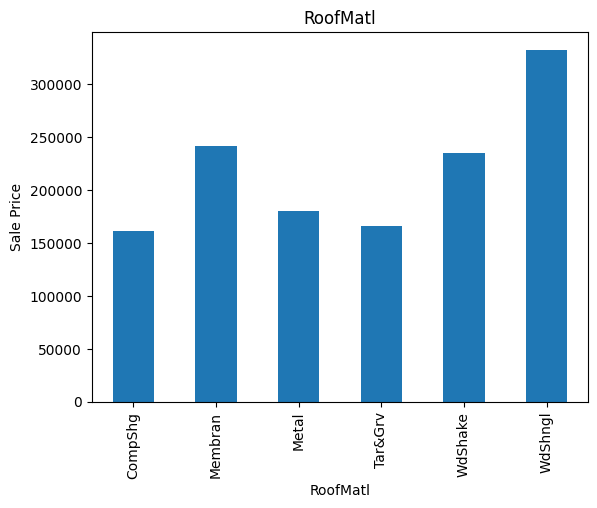

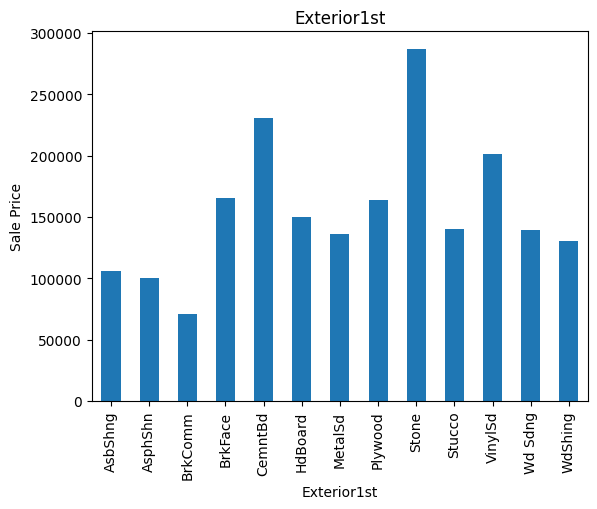

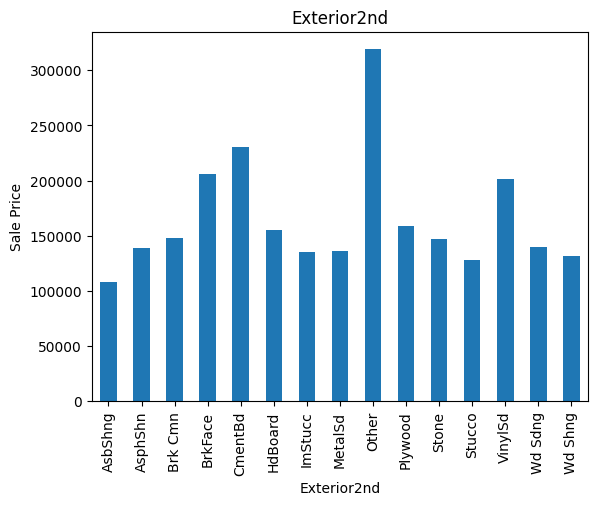

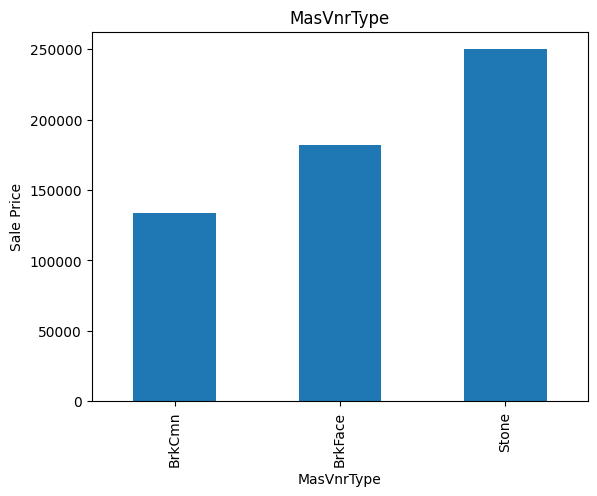

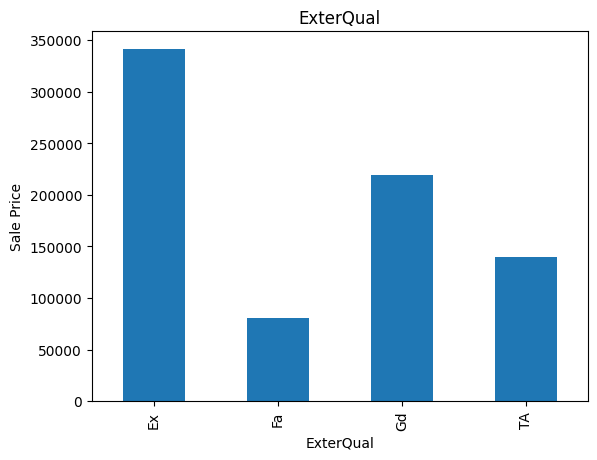

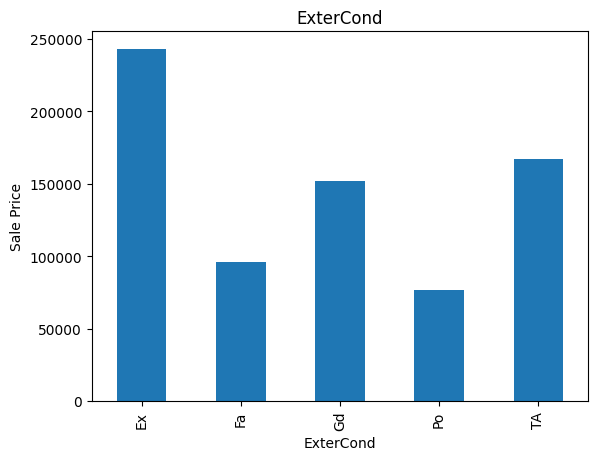

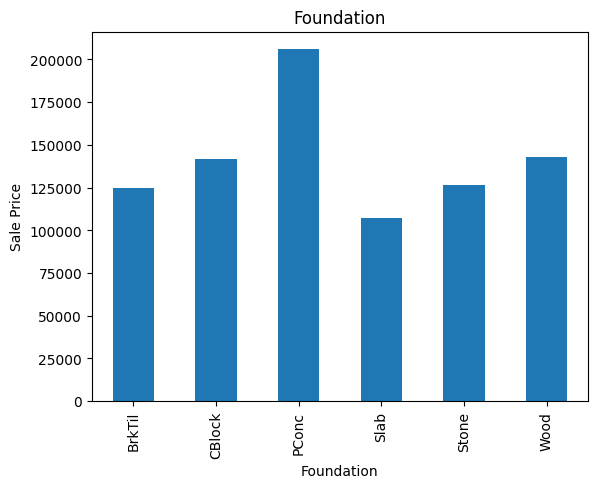

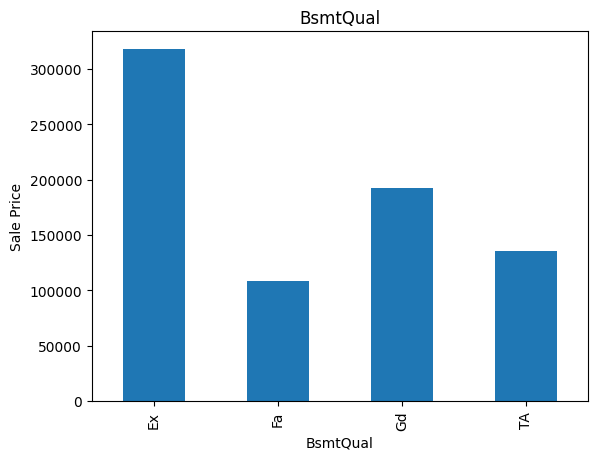

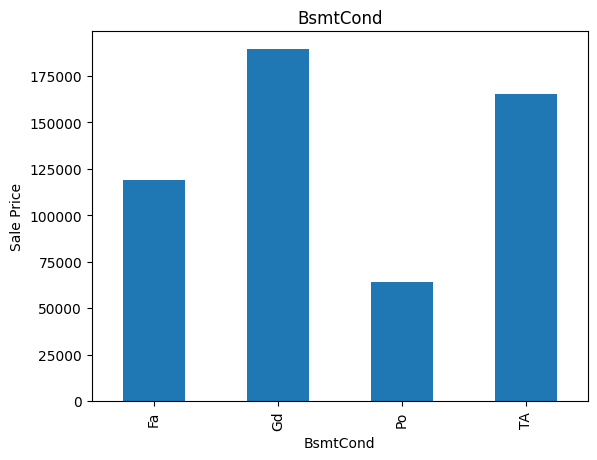

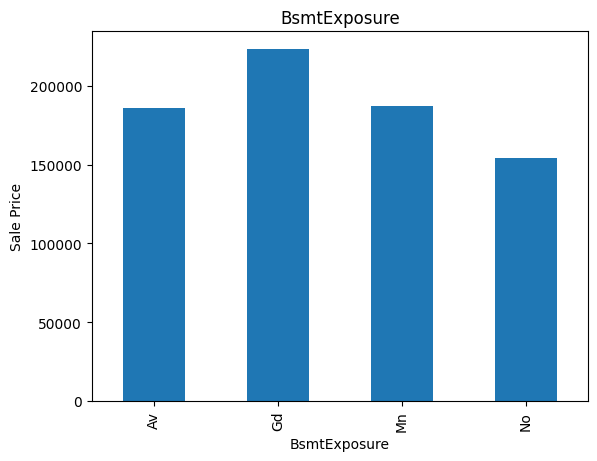

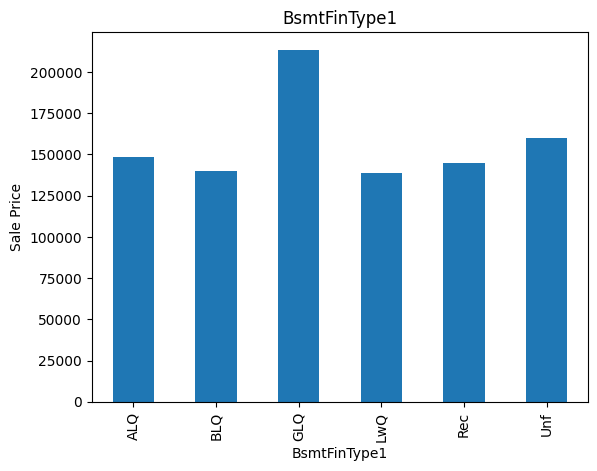

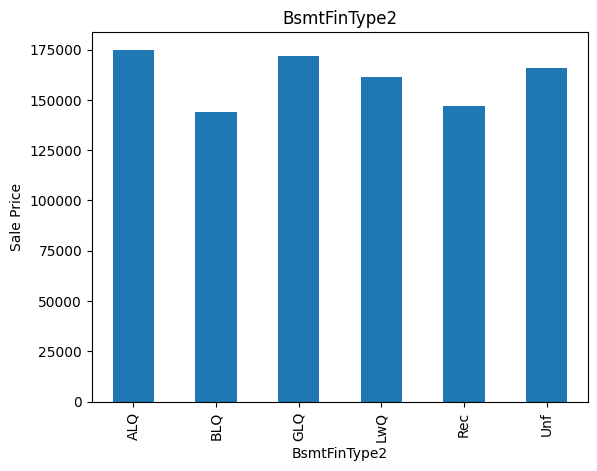

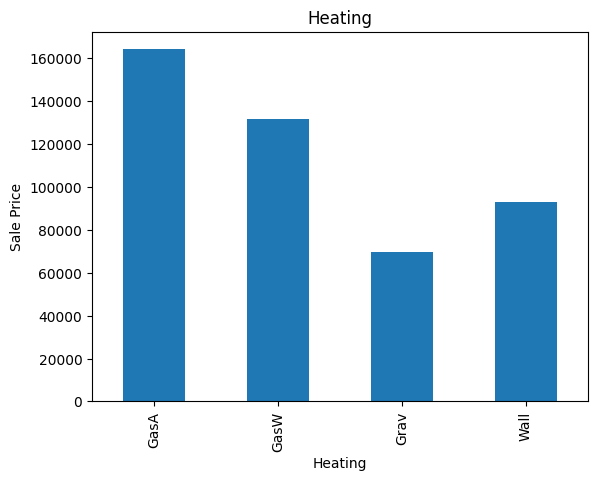

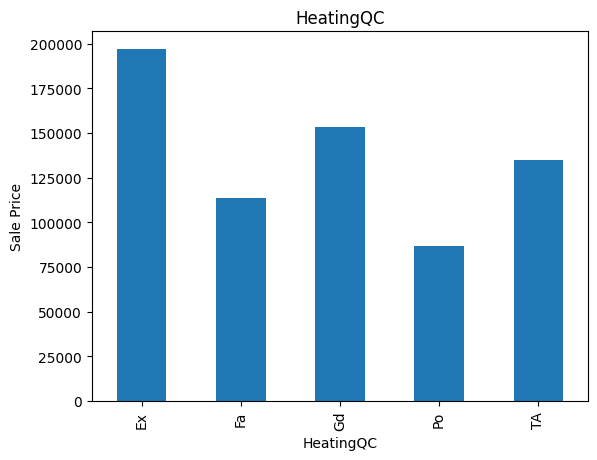

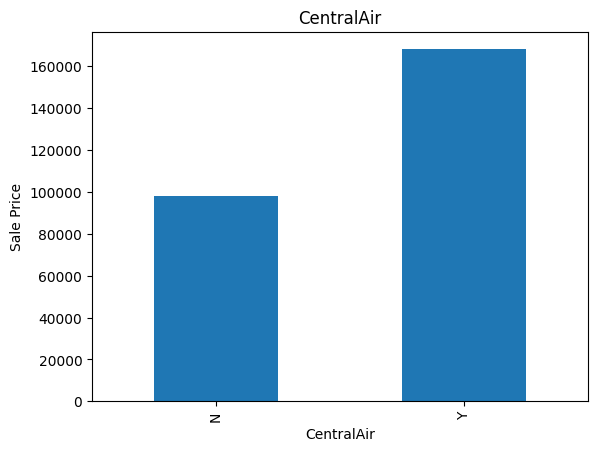

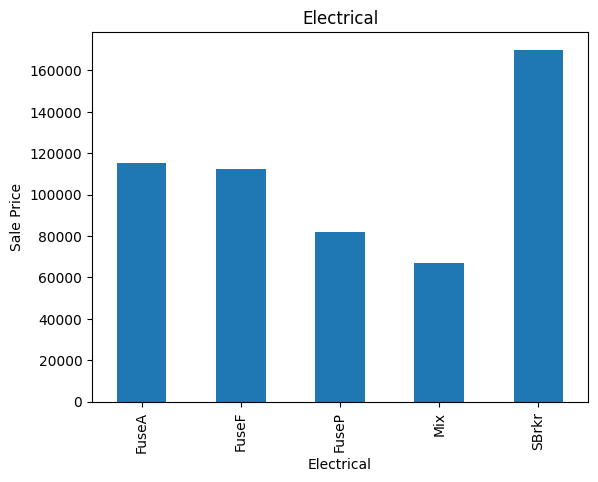

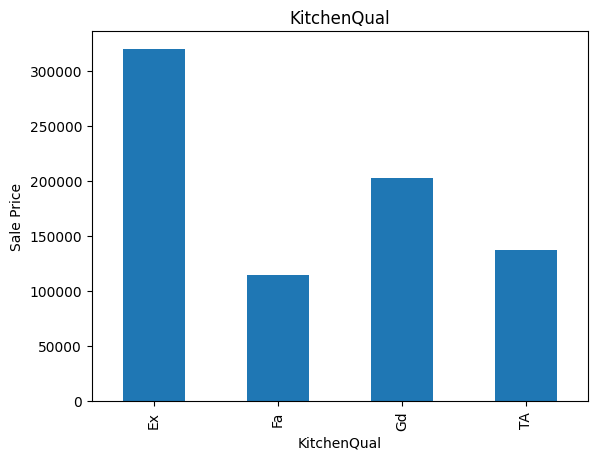

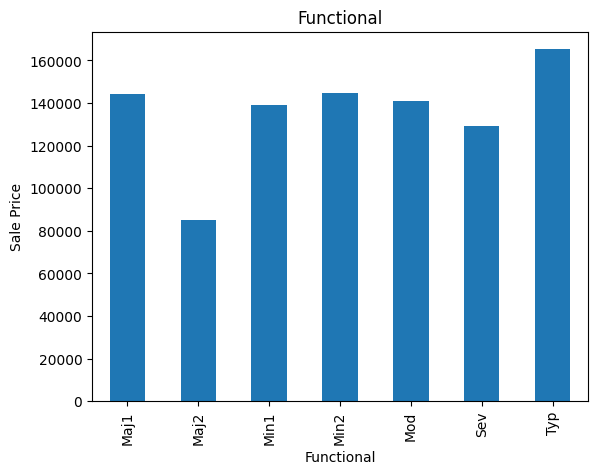

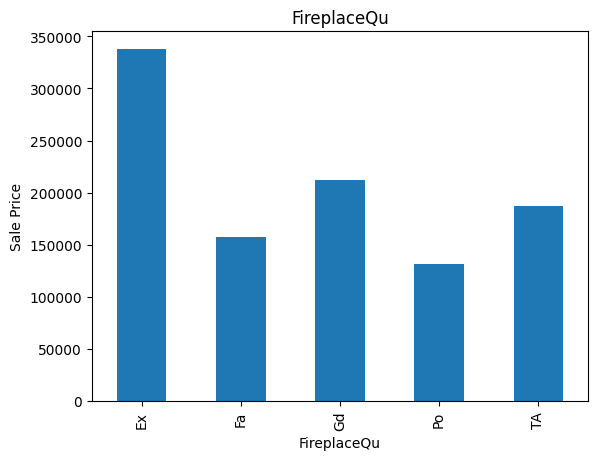

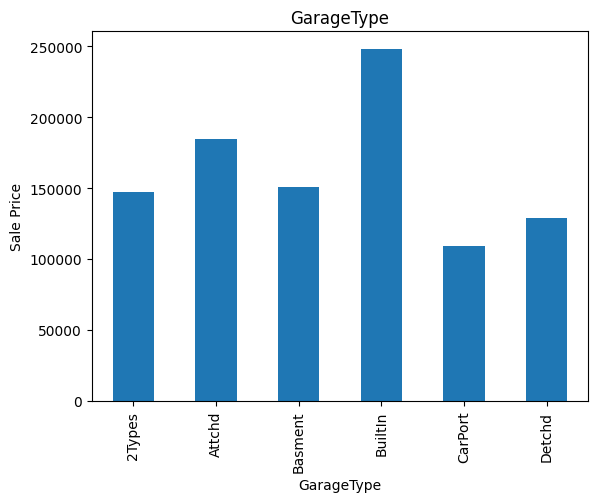

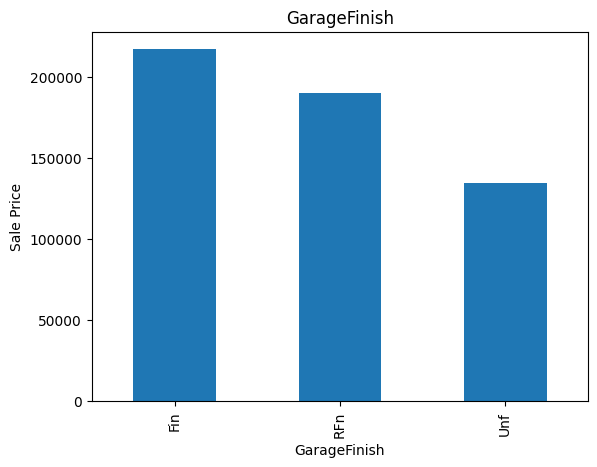

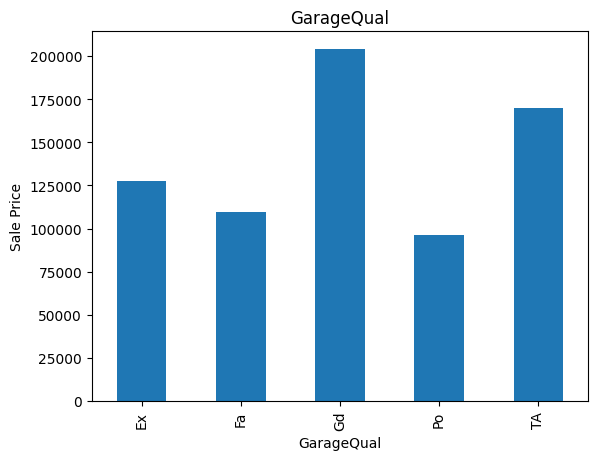

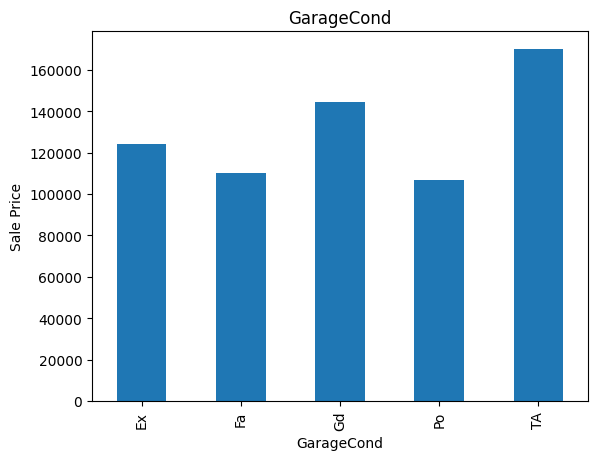

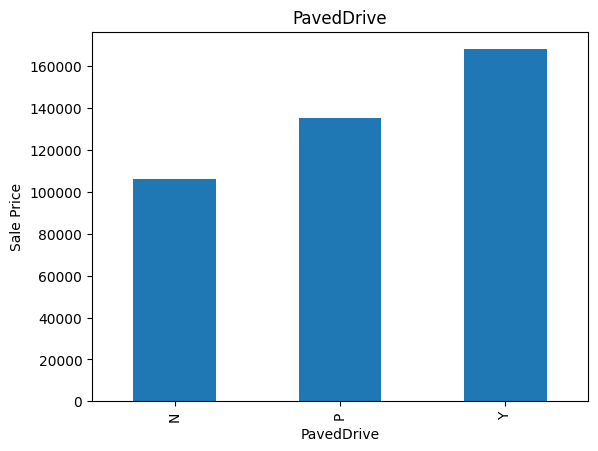

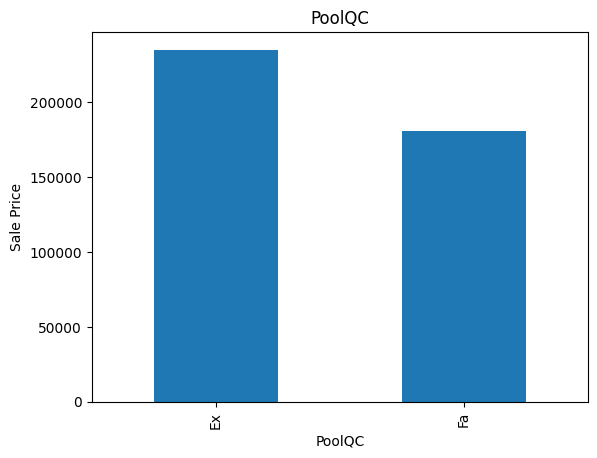

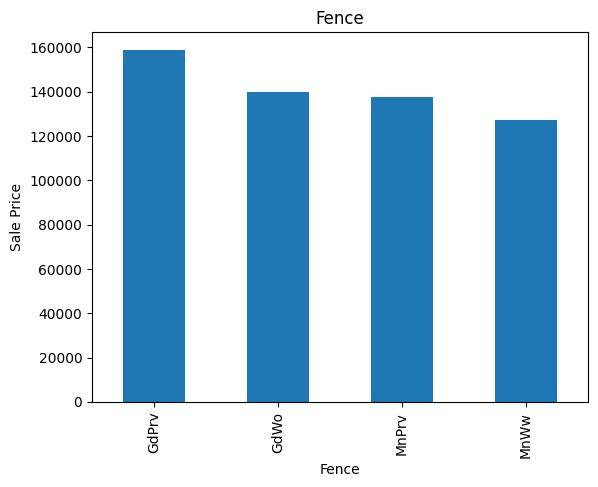

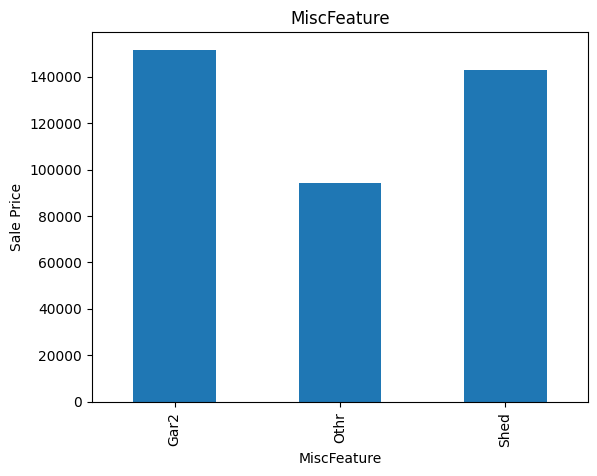

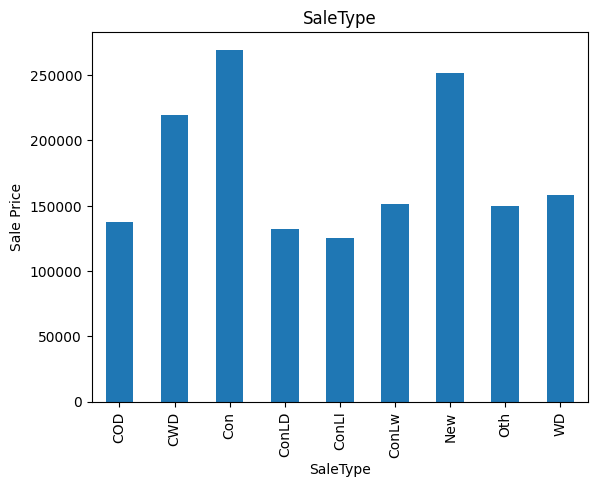

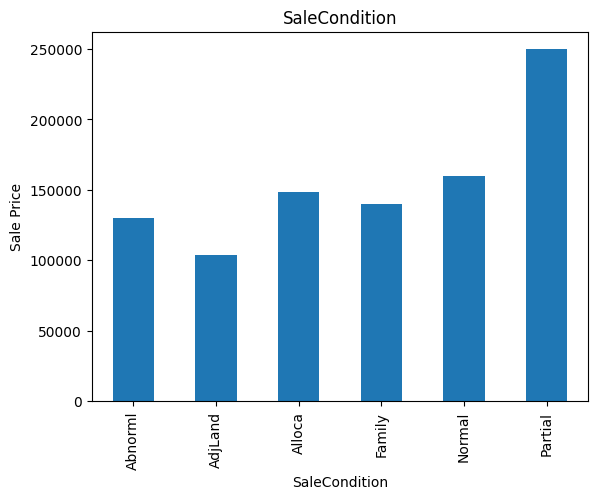

In [29]:
# Relationship Between the Categorical features and Sale Price.

for feature in cat_features:

  df = data.copy()

  df.groupby(feature)["SalePrice"].median().plot.bar()
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel("Sale Price")
  plt.show()

There is certainly relationship between some categorical features and Sale price.
  

# Feature Engineering

In [30]:
# Categorical features with nan values

cat_features_nan = [feature for feature in data.columns if data[feature].dtype == "O" and data[feature].isnull().sum()>1]

for feature in cat_features_nan:
  print(feature,"has" ,np.round(data[feature].isnull().mean(), 4), "% of missing values.")

Alley has 0.9373 % of missing values.
MasVnrType has 0.5891 % of missing values.
BsmtQual has 0.0282 % of missing values.
BsmtCond has 0.0282 % of missing values.
BsmtExposure has 0.0291 % of missing values.
BsmtFinType1 has 0.0282 % of missing values.
BsmtFinType2 has 0.0291 % of missing values.
FireplaceQu has 0.4764 % of missing values.
GarageType has 0.0555 % of missing values.
GarageFinish has 0.0555 % of missing values.
GarageQual has 0.0555 % of missing values.
GarageCond has 0.0555 % of missing values.
PoolQC has 0.9982 % of missing values.
Fence has 0.8109 % of missing values.
MiscFeature has 0.9582 % of missing values.


In [31]:
# Replacing the missing values with the new label "missing"

def replace_miss_val(data, features):
  df = data.copy()

  df[features] = df[features].fillna("missing")
  return df

data = replace_miss_val(data, cat_features_nan)
data[cat_features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [32]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [33]:
# Numerical features with nan values

numerical_features_nan = [features for features in data.columns if data[features].dtype != "O" and data[features].isnull().sum()>1]

for feature in numerical_features_nan:
  print(feature, "has", np.round(data[feature].isnull().mean(), 4), "% of missing values.")

LotFrontage has 0.1745 % of missing values.
MasVnrArea has 0.0055 % of missing values.
GarageYrBlt has 0.0555 % of missing values.


In [34]:
# Replacing Numerical value

for feature in numerical_features_nan:
# we will replace using median values b'cuz of outliers
  median_value = data[feature].median()

  data[feature+"_nan"] = np.where(data[feature].isnull(), 1, 0)
  data[feature].fillna(median_value, inplace = True)

data[numerical_features_nan].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [35]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,missing,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,missing,missing,missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,70.0,10382,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,missing,missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,missing,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,

In [36]:
# Year variable

for feature in year_features:
  if feature != "YrSold":
    data[feature] = data["YrSold"] - data[feature]

In [37]:
# we convert the year into numerical data
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [38]:
skew_features = ["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea"]

for feature in skew_features:

    # Applying Log transformation on features
    data[feature] = np.log(data[feature])

In [39]:
data[["LotFrontage", "LotArea", "1stFlrSF", "GrLivArea"]].head(10)

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.174387,9.041922,6.752270,7.444249
1,4.382027,9.169518,7.140453,7.140453
2,4.219508,9.328123,6.824374,7.487734
3,4.094345,9.164296,6.867974,7.448334
4,4.430817,9.565214,7.043160,7.695303
5,4.442651,9.554993,6.679599,7.216709
6,4.317488,9.218705,7.434848,7.434848
7,4.248495,9.247829,7.009409,7.644919
8,3.931826,8.719317,6.929517,7.480992
9,3.912023,8.911934,6.981935,6.981935


In [40]:
data["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [41]:
# temp = data.groupby("Street")["SalePrice"].count()/len(data)
# temp_df = temp[temp>0.01].index
# print(temp_df)
# print(data["Street"].unique())

In [42]:
# Now we will remove categorical variable that are present less than 1% of the observation in categorical columns.

for feature in cat_features:
  temp = data.groupby(feature)["SalePrice"].count()/len(data)
  temp_df = temp[temp>0.01].index
  data[feature] = np.where(data[feature].isin(temp_df), data[feature], "rare_var")

Label Encoding

In [43]:
# Before that let's just drop the id column and droping cols which has more than 10 unique values.
cols_drop = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
data.drop(cols_drop, axis = 1, inplace = True)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
cat_for_le = [feature for feature in cat_features if feature not in cols_drop]
print(cat_for_le)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
# Label Encoding on categorical variable

data['MSZoning'] = le.fit_transform(data["MSZoning"])
data["Street"] = le.fit_transform(data["Street"])
data["Alley"] = le.fit_transform(data["Alley"])
data["LotConfig"] = le.fit_transform(data["LotConfig"])
data["Utilities"] = le.fit_transform(data["Utilities"])
data["LandContour"] = le.fit_transform(data["LandContour"])
data["LotShape"] = le.fit_transform(data["LotShape"])
data["BldgType"] = le.fit_transform(data["BldgType"])
data["Condition2"] = le.fit_transform(data["Condition2"])
data["Condition1"] = le.fit_transform(data["Condition1"])
data["LandSlope"] = le.fit_transform(data["LandSlope"])
data["RoofStyle"] = le.fit_transform(data["RoofStyle"])
data["RoofMatl"] = le.fit_transform(data["RoofMatl"])
data["HouseStyle"] = le.fit_transform(data["HouseStyle"])
data["BsmtFinType2"] = le.fit_transform(data["BsmtFinType2"])
data["BsmtFinType1"] = le.fit_transform(data["BsmtFinType1"])
data["BsmtExposure"] = le.fit_transform(data["BsmtExposure"])
data["BsmtCond"] = le.fit_transform(data["BsmtCond"])
data["BsmtQual"] = le.fit_transform(data["BsmtQual"])
data["Foundation"] = le.fit_transform(data["Foundation"])
data["ExterCond"] = le.fit_transform(data["ExterCond"])
data["ExterQual"] = le.fit_transform(data["ExterQual"])
data["MasVnrType"] = le.fit_transform(data["MasVnrType"])
data["FireplaceQu"] = le.fit_transform(data["FireplaceQu"])
data["Functional"] = le.fit_transform(data["Functional"])
data["KitchenQual"] = le.fit_transform(data["KitchenQual"])
data["Electrical"] = le.fit_transform(data["Electrical"])
data["CentralAir"] = le.fit_transform(data["CentralAir"])
data["HeatingQC"] = le.fit_transform(data["HeatingQC"])
data["Heating"] = le.fit_transform(data["Heating"])
data["SaleCondition"] = le.fit_transform(data["SaleCondition"])
data["SaleType"] = le.fit_transform(data["SaleType"])
data["MiscFeature"] = le.fit_transform(data["MiscFeature"])
data["Fence"] = le.fit_transform(data["Fence"])
data["PoolQC"] = le.fit_transform(data["PoolQC"])
data["PavedDrive"] = le.fit_transform(data["PavedDrive"])
data["GarageCond"] = le.fit_transform(data["GarageCond"])
data["GarageQual"] = le.fit_transform(data["GarageQual"])
data["GarageFinish"] = le.fit_transform(data["GarageFinish"])
data["GarageType"] = le.fit_transform(data["GarageType"])



In [47]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,2,4.174387,9.041922,0,2,2,3,0,3,0,2,0,0,3,7,5,5,5,1,0,1,196.0,1,2,2,2,2,3,2,706,5,0,150,856,0,0,1,2,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,3,0,5,0,5.0,1,2,548,1,1,2,0,61,0,0,0,0,0,3,1,0,2,2008,2,2,208500,0,0,0
1,2,20,2,4.382027,9.169518,0,2,2,3,0,2,0,1,0,0,2,6,8,31,31,1,0,3,0.0,2,2,1,2,2,1,0,978,5,0,284,1262,0,0,1,2,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,3,1,4,0,31.0,1,2,460,1,1,2,298,0,0,0,0,0,0,3,1,0,5,2007,2,2,181500,0,0,0
2,3,60,2,4.219508,9.328123,0,2,0,3,0,3,0,2,0,0,3,7,5,7,6,1,0,1,162.0,1,2,2,2,2,2,2,486,5,0,434,920,0,0,1,2,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,3,1,4,0,7.0,1,2,608,1,1,2,0,42,0,0,0,0,0,3,1,0,9,2008,2,2,223500,0,0,0
3,4,70,2,4.094345,9.164296,0,2,0,3,0,0,0,2,0,0,3,7,5,91,36,1,0,3,0.0,2,2,0,3,1,3,0,216,5,0,540,756,0,2,1,2,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,3,1,2,3,8.0,2,3,642,1,1,2,0,35,272,0,0,0,0,3,1,0,2,2006,2,0,140000,0,0,0
4,5,60,2,4.430817,9.565214,0,2,0,3,0,2,0,2,0,0,3,8,5,8,8,1,0,1,350.0,1,2,2,2,2,0,2,655,5,0,490,1145,0,0,1,2,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,3,1,4,0,8.0,1,3,836,1,1,2,192,84,0,0,0,0,0,3,1,0,12,2008,2,2,250000,0,0,0


In [48]:
# feature_scaled = [feature for feature in data.columns if feature not in["Id", "SalePrice"]]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(data[feature_scaled])

In [49]:
# scaler.transform(data[feature_scaled])

In [50]:
# final_data = pd.concat([data[["Id", "SalePrice"]].reset_index(drop = True),
#                        pd.DataFrame(scaler.transform(data[feature_scaled]), columns = feature_scaled)], axis = 1 )

In [51]:
# final_data.head()

# Feature Selection

In [52]:
X = data.drop(["Id", 'SalePrice'], axis = 1)
y = data["SalePrice"]

In [53]:
X.shape, y.shape

((1100, 79), (1100,))

In [54]:
# from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression

In [55]:
selector = SelectKBest(score_func=f_regression, k = 10)
X_train_selected = selector.fit_transform(X, y)

In [56]:
X.columns[selector.get_support()]

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea'],
      dtype='object')

In [57]:
selected_feature = data[X.columns[selector.get_support()]]
selected_feature

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea
0,7,1,2,856,6.752270,7.444249,2,2,2,548
1,6,2,2,1262,7.140453,7.140453,2,3,2,460
2,7,1,2,920,6.824374,7.487734,2,2,2,608
3,7,2,3,756,6.867974,7.448334,1,2,3,642
4,8,1,2,1145,7.043160,7.695303,2,2,3,836
...,...,...,...,...,...,...,...,...,...,...
1095,6,1,2,1314,7.180831,7.180831,2,2,2,440
1096,6,2,3,684,6.650279,7.211557,1,2,0,0
1097,8,1,2,1074,6.992096,6.992096,1,2,2,461
1098,4,2,3,672,6.629363,7.188413,1,3,1,240


In [58]:
# X_test_selected = selector.transform(X_test)

In [59]:
# X_test_selected.shape

# Feature Scaling

In [60]:
feature_scaled = [feature for feature in selected_feature.columns]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[feature_scaled])

MinMaxScaler()

In [61]:
scaler.transform(data[feature_scaled])

array([[0.66666667, 0.33333333, 0.5       , ..., 0.66666667, 0.5       ,
        0.3942446 ],
       [0.55555556, 0.66666667, 0.5       , ..., 1.        , 0.5       ,
        0.33093525],
       [0.66666667, 0.33333333, 0.5       , ..., 0.66666667, 0.5       ,
        0.43741007],
       ...,
       [0.77777778, 0.33333333, 0.5       , ..., 0.66666667, 0.5       ,
        0.33165468],
       [0.33333333, 0.66666667, 0.75      , ..., 1.        , 0.25      ,
        0.17266187],
       [0.66666667, 0.66666667, 0.5       , ..., 1.        , 0.5       ,
        0.34388489]])

In [62]:
final_data = pd.DataFrame(scaler.transform(data[feature_scaled]), columns = feature_scaled)

In [63]:
final_data.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea
0,0.666667,0.333333,0.50,0.266999,0.414873,0.618822,0.666667,0.666667,0.50,0.394245
1,0.555556,0.666667,0.50,0.393637,0.585993,0.503707,0.666667,1.000000,0.50,0.330935
2,0.666667,0.333333,0.50,0.286962,0.446658,0.635300,0.666667,0.666667,0.50,0.437410
3,0.666667,0.666667,0.75,0.235808,0.465878,0.620370,0.333333,0.666667,0.75,0.461871
4,0.777778,0.333333,0.50,0.357143,0.543104,0.713953,0.666667,0.666667,0.75,0.601439


Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size = 0.2, random_state=1)

# NN Model

In [65]:
import keras
import tensorflow as tf
from keras import models, layers
from keras.layers import Layer, Dense, Dropout

In [66]:
# define model

model = models.Sequential()
model.add(Dense(256, activation = "elu", kernel_initializer="he_normal", input_dim = 10))
model.add(Dropout(0.3))
model.add(Dense(128, activation = "elu", kernel_initializer="he_normal"))
# model.add(Dropout(0.3))
model.add(Dense(64, activation = "elu", kernel_initializer="he_normal"))
model.add(Dense(1, activation = "linear"))

In [67]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=[keras.metrics.MeanSquaredError()])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (172.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model_hist = model.fit(X_train, y_train, epochs = 1000, batch_size = 60, verbose = 2)

Epoch 1/1000
15/15 - 2s - loss: 38902726656.0000 - mean_squared_error: 38902726656.0000 - 2s/epoch - 122ms/step
Epoch 2/1000
15/15 - 0s - loss: 34973741056.0000 - mean_squared_error: 34973741056.0000 - 49ms/epoch - 3ms/step
Epoch 3/1000
15/15 - 0s - loss: 16739742720.0000 - mean_squared_error: 16739742720.0000 - 35ms/epoch - 2ms/step
Epoch 4/1000
15/15 - 0s - loss: 6597496832.0000 - mean_squared_error: 6597496832.0000 - 36ms/epoch - 2ms/step
Epoch 5/1000
15/15 - 0s - loss: 5179757056.0000 - mean_squared_error: 5179757056.0000 - 35ms/epoch - 2ms/step
Epoch 6/1000
15/15 - 0s - loss: 4653155328.0000 - mean_squared_error: 4653155328.0000 - 37ms/epoch - 2ms/step
Epoch 7/1000
15/15 - 0s - loss: 4027753728.0000 - mean_squared_error: 4027753984.0000 - 35ms/epoch - 2ms/step
Epoch 8/1000
15/15 - 0s - loss: 3474016512.0000 - mean_squared_error: 3474016512.0000 - 36ms/epoch - 2ms/step
Epoch 9/1000
15/15 - 0s - loss: 2689074432.0000 - mean_squared_error: 2689074432.0000 - 33ms/epoch - 2ms/step
Epoc

Epoch 75/1000
15/15 - 0s - loss: 1420668288.0000 - mean_squared_error: 1420668288.0000 - 35ms/epoch - 2ms/step
Epoch 76/1000
15/15 - 0s - loss: 1401040768.0000 - mean_squared_error: 1401040768.0000 - 30ms/epoch - 2ms/step
Epoch 77/1000
15/15 - 0s - loss: 1261504384.0000 - mean_squared_error: 1261504384.0000 - 37ms/epoch - 2ms/step
Epoch 78/1000
15/15 - 0s - loss: 1323011840.0000 - mean_squared_error: 1323011840.0000 - 35ms/epoch - 2ms/step
Epoch 79/1000
15/15 - 0s - loss: 1265053568.0000 - mean_squared_error: 1265053568.0000 - 31ms/epoch - 2ms/step
Epoch 80/1000
15/15 - 0s - loss: 1402915328.0000 - mean_squared_error: 1402915328.0000 - 38ms/epoch - 3ms/step
Epoch 81/1000
15/15 - 0s - loss: 1358720896.0000 - mean_squared_error: 1358720896.0000 - 34ms/epoch - 2ms/step
Epoch 82/1000
15/15 - 0s - loss: 1247508736.0000 - mean_squared_error: 1247508736.0000 - 34ms/epoch - 2ms/step
Epoch 83/1000
15/15 - 0s - loss: 1296431232.0000 - mean_squared_error: 1296431232.0000 - 29ms/epoch - 2ms/step
E

Epoch 149/1000
15/15 - 0s - loss: 1209092864.0000 - mean_squared_error: 1209092864.0000 - 42ms/epoch - 3ms/step
Epoch 150/1000
15/15 - 0s - loss: 1243746944.0000 - mean_squared_error: 1243746944.0000 - 35ms/epoch - 2ms/step
Epoch 151/1000
15/15 - 0s - loss: 1288523648.0000 - mean_squared_error: 1288523648.0000 - 33ms/epoch - 2ms/step
Epoch 152/1000
15/15 - 0s - loss: 1173880192.0000 - mean_squared_error: 1173880192.0000 - 35ms/epoch - 2ms/step
Epoch 153/1000
15/15 - 0s - loss: 1270060928.0000 - mean_squared_error: 1270060928.0000 - 30ms/epoch - 2ms/step
Epoch 154/1000
15/15 - 0s - loss: 1167677312.0000 - mean_squared_error: 1167677312.0000 - 39ms/epoch - 3ms/step
Epoch 155/1000
15/15 - 0s - loss: 1187914496.0000 - mean_squared_error: 1187914496.0000 - 33ms/epoch - 2ms/step
Epoch 156/1000
15/15 - 0s - loss: 1229631104.0000 - mean_squared_error: 1229631104.0000 - 35ms/epoch - 2ms/step
Epoch 157/1000
15/15 - 0s - loss: 1156379904.0000 - mean_squared_error: 1156379904.0000 - 31ms/epoch - 2

Epoch 223/1000
15/15 - 0s - loss: 1104946176.0000 - mean_squared_error: 1104946176.0000 - 35ms/epoch - 2ms/step
Epoch 224/1000
15/15 - 0s - loss: 1101697792.0000 - mean_squared_error: 1101697792.0000 - 34ms/epoch - 2ms/step
Epoch 225/1000
15/15 - 0s - loss: 1124706816.0000 - mean_squared_error: 1124706816.0000 - 34ms/epoch - 2ms/step
Epoch 226/1000
15/15 - 0s - loss: 1170136192.0000 - mean_squared_error: 1170136192.0000 - 32ms/epoch - 2ms/step
Epoch 227/1000
15/15 - 0s - loss: 1182136960.0000 - mean_squared_error: 1182136960.0000 - 38ms/epoch - 3ms/step
Epoch 228/1000
15/15 - 0s - loss: 1192610560.0000 - mean_squared_error: 1192610560.0000 - 36ms/epoch - 2ms/step
Epoch 229/1000
15/15 - 0s - loss: 1166664832.0000 - mean_squared_error: 1166664832.0000 - 38ms/epoch - 3ms/step
Epoch 230/1000
15/15 - 0s - loss: 1117725568.0000 - mean_squared_error: 1117725568.0000 - 34ms/epoch - 2ms/step
Epoch 231/1000
15/15 - 0s - loss: 1264716544.0000 - mean_squared_error: 1264716544.0000 - 34ms/epoch - 2

Epoch 297/1000
15/15 - 0s - loss: 1129784576.0000 - mean_squared_error: 1129784576.0000 - 33ms/epoch - 2ms/step
Epoch 298/1000
15/15 - 0s - loss: 1147100032.0000 - mean_squared_error: 1147100032.0000 - 35ms/epoch - 2ms/step
Epoch 299/1000
15/15 - 0s - loss: 1129299456.0000 - mean_squared_error: 1129299328.0000 - 35ms/epoch - 2ms/step
Epoch 300/1000
15/15 - 0s - loss: 1154314496.0000 - mean_squared_error: 1154314496.0000 - 31ms/epoch - 2ms/step
Epoch 301/1000
15/15 - 0s - loss: 1140870912.0000 - mean_squared_error: 1140870912.0000 - 41ms/epoch - 3ms/step
Epoch 302/1000
15/15 - 0s - loss: 1274678784.0000 - mean_squared_error: 1274678784.0000 - 36ms/epoch - 2ms/step
Epoch 303/1000
15/15 - 0s - loss: 1158594944.0000 - mean_squared_error: 1158594944.0000 - 30ms/epoch - 2ms/step
Epoch 304/1000
15/15 - 0s - loss: 1134900736.0000 - mean_squared_error: 1134900736.0000 - 42ms/epoch - 3ms/step
Epoch 305/1000
15/15 - 0s - loss: 1152034688.0000 - mean_squared_error: 1152034688.0000 - 29ms/epoch - 2

Epoch 371/1000
15/15 - 0s - loss: 1067735360.0000 - mean_squared_error: 1067735360.0000 - 34ms/epoch - 2ms/step
Epoch 372/1000
15/15 - 0s - loss: 1115076096.0000 - mean_squared_error: 1115076096.0000 - 28ms/epoch - 2ms/step
Epoch 373/1000
15/15 - 0s - loss: 1110541312.0000 - mean_squared_error: 1110541312.0000 - 42ms/epoch - 3ms/step
Epoch 374/1000
15/15 - 0s - loss: 1057471488.0000 - mean_squared_error: 1057471488.0000 - 38ms/epoch - 3ms/step
Epoch 375/1000
15/15 - 0s - loss: 1104703360.0000 - mean_squared_error: 1104703360.0000 - 34ms/epoch - 2ms/step
Epoch 376/1000
15/15 - 0s - loss: 1174847104.0000 - mean_squared_error: 1174847104.0000 - 36ms/epoch - 2ms/step
Epoch 377/1000
15/15 - 0s - loss: 1187035648.0000 - mean_squared_error: 1187035648.0000 - 30ms/epoch - 2ms/step
Epoch 378/1000
15/15 - 0s - loss: 1137670912.0000 - mean_squared_error: 1137670912.0000 - 40ms/epoch - 3ms/step
Epoch 379/1000
15/15 - 0s - loss: 1175176832.0000 - mean_squared_error: 1175176832.0000 - 34ms/epoch - 2

Epoch 445/1000
15/15 - 0s - loss: 1100388864.0000 - mean_squared_error: 1100388864.0000 - 36ms/epoch - 2ms/step
Epoch 446/1000
15/15 - 0s - loss: 1077119104.0000 - mean_squared_error: 1077119104.0000 - 34ms/epoch - 2ms/step
Epoch 447/1000
15/15 - 0s - loss: 1289484160.0000 - mean_squared_error: 1289484160.0000 - 35ms/epoch - 2ms/step
Epoch 448/1000
15/15 - 0s - loss: 1083790976.0000 - mean_squared_error: 1083790976.0000 - 29ms/epoch - 2ms/step
Epoch 449/1000
15/15 - 0s - loss: 1091378432.0000 - mean_squared_error: 1091378432.0000 - 42ms/epoch - 3ms/step
Epoch 450/1000
15/15 - 0s - loss: 1077865472.0000 - mean_squared_error: 1077865472.0000 - 31ms/epoch - 2ms/step
Epoch 451/1000
15/15 - 0s - loss: 1176833792.0000 - mean_squared_error: 1176833792.0000 - 39ms/epoch - 3ms/step
Epoch 452/1000
15/15 - 0s - loss: 1105179776.0000 - mean_squared_error: 1105179776.0000 - 34ms/epoch - 2ms/step
Epoch 453/1000
15/15 - 0s - loss: 1176072960.0000 - mean_squared_error: 1176072960.0000 - 36ms/epoch - 2

Epoch 519/1000
15/15 - 0s - loss: 1033332480.0000 - mean_squared_error: 1033332480.0000 - 34ms/epoch - 2ms/step
Epoch 520/1000
15/15 - 0s - loss: 1230355840.0000 - mean_squared_error: 1230355840.0000 - 35ms/epoch - 2ms/step
Epoch 521/1000
15/15 - 0s - loss: 1045599872.0000 - mean_squared_error: 1045599872.0000 - 29ms/epoch - 2ms/step
Epoch 522/1000
15/15 - 0s - loss: 1082328576.0000 - mean_squared_error: 1082328576.0000 - 41ms/epoch - 3ms/step
Epoch 523/1000
15/15 - 0s - loss: 1119198848.0000 - mean_squared_error: 1119198848.0000 - 35ms/epoch - 2ms/step
Epoch 524/1000
15/15 - 0s - loss: 1127873408.0000 - mean_squared_error: 1127873408.0000 - 31ms/epoch - 2ms/step
Epoch 525/1000
15/15 - 0s - loss: 1116335232.0000 - mean_squared_error: 1116335232.0000 - 39ms/epoch - 3ms/step
Epoch 526/1000
15/15 - 0s - loss: 1039750848.0000 - mean_squared_error: 1039750848.0000 - 34ms/epoch - 2ms/step
Epoch 527/1000
15/15 - 0s - loss: 1107735680.0000 - mean_squared_error: 1107735680.0000 - 37ms/epoch - 2

Epoch 593/1000
15/15 - 0s - loss: 1110319872.0000 - mean_squared_error: 1110319872.0000 - 35ms/epoch - 2ms/step
Epoch 594/1000
15/15 - 0s - loss: 1055508288.0000 - mean_squared_error: 1055508288.0000 - 32ms/epoch - 2ms/step
Epoch 595/1000
15/15 - 0s - loss: 1107630976.0000 - mean_squared_error: 1107630976.0000 - 39ms/epoch - 3ms/step
Epoch 596/1000
15/15 - 0s - loss: 1034496576.0000 - mean_squared_error: 1034496576.0000 - 35ms/epoch - 2ms/step
Epoch 597/1000
15/15 - 0s - loss: 1097175296.0000 - mean_squared_error: 1097175296.0000 - 33ms/epoch - 2ms/step
Epoch 598/1000
15/15 - 0s - loss: 1042738752.0000 - mean_squared_error: 1042738752.0000 - 38ms/epoch - 3ms/step
Epoch 599/1000
15/15 - 0s - loss: 1036299328.0000 - mean_squared_error: 1036299328.0000 - 34ms/epoch - 2ms/step
Epoch 600/1000
15/15 - 0s - loss: 1114964096.0000 - mean_squared_error: 1114964096.0000 - 31ms/epoch - 2ms/step
Epoch 601/1000
15/15 - 0s - loss: 1069255296.0000 - mean_squared_error: 1069255296.0000 - 38ms/epoch - 3

Epoch 667/1000
15/15 - 0s - loss: 1138451200.0000 - mean_squared_error: 1138451200.0000 - 33ms/epoch - 2ms/step
Epoch 668/1000
15/15 - 0s - loss: 1162489216.0000 - mean_squared_error: 1162489216.0000 - 29ms/epoch - 2ms/step
Epoch 669/1000
15/15 - 0s - loss: 1084948864.0000 - mean_squared_error: 1084948864.0000 - 43ms/epoch - 3ms/step
Epoch 670/1000
15/15 - 0s - loss: 1037897088.0000 - mean_squared_error: 1037897088.0000 - 30ms/epoch - 2ms/step
Epoch 671/1000
15/15 - 0s - loss: 978570304.0000 - mean_squared_error: 978570304.0000 - 41ms/epoch - 3ms/step
Epoch 672/1000
15/15 - 0s - loss: 1086536320.0000 - mean_squared_error: 1086536320.0000 - 31ms/epoch - 2ms/step
Epoch 673/1000
15/15 - 0s - loss: 1058249664.0000 - mean_squared_error: 1058249664.0000 - 39ms/epoch - 3ms/step
Epoch 674/1000
15/15 - 0s - loss: 1038837632.0000 - mean_squared_error: 1038837632.0000 - 34ms/epoch - 2ms/step
Epoch 675/1000
15/15 - 0s - loss: 1016864768.0000 - mean_squared_error: 1016864768.0000 - 38ms/epoch - 3ms

Epoch 741/1000
15/15 - 0s - loss: 1032648832.0000 - mean_squared_error: 1032648832.0000 - 34ms/epoch - 2ms/step
Epoch 742/1000
15/15 - 0s - loss: 1101273088.0000 - mean_squared_error: 1101273088.0000 - 33ms/epoch - 2ms/step
Epoch 743/1000
15/15 - 0s - loss: 1113102336.0000 - mean_squared_error: 1113102336.0000 - 37ms/epoch - 2ms/step
Epoch 744/1000
15/15 - 0s - loss: 1114367744.0000 - mean_squared_error: 1114367744.0000 - 35ms/epoch - 2ms/step
Epoch 745/1000
15/15 - 0s - loss: 1068552256.0000 - mean_squared_error: 1068552256.0000 - 35ms/epoch - 2ms/step
Epoch 746/1000
15/15 - 0s - loss: 1138533376.0000 - mean_squared_error: 1138533376.0000 - 29ms/epoch - 2ms/step
Epoch 747/1000
15/15 - 0s - loss: 1052557440.0000 - mean_squared_error: 1052557440.0000 - 42ms/epoch - 3ms/step
Epoch 748/1000
15/15 - 0s - loss: 1054605760.0000 - mean_squared_error: 1054605760.0000 - 36ms/epoch - 2ms/step
Epoch 749/1000
15/15 - 0s - loss: 1095966080.0000 - mean_squared_error: 1095966080.0000 - 35ms/epoch - 2

Epoch 815/1000
15/15 - 0s - loss: 1032275840.0000 - mean_squared_error: 1032275840.0000 - 33ms/epoch - 2ms/step
Epoch 816/1000
15/15 - 0s - loss: 1017261568.0000 - mean_squared_error: 1017261568.0000 - 33ms/epoch - 2ms/step
Epoch 817/1000
15/15 - 0s - loss: 1160013056.0000 - mean_squared_error: 1160013056.0000 - 36ms/epoch - 2ms/step
Epoch 818/1000
15/15 - 0s - loss: 1085762560.0000 - mean_squared_error: 1085762560.0000 - 28ms/epoch - 2ms/step
Epoch 819/1000
15/15 - 0s - loss: 1054577856.0000 - mean_squared_error: 1054577856.0000 - 42ms/epoch - 3ms/step
Epoch 820/1000
15/15 - 0s - loss: 1085666560.0000 - mean_squared_error: 1085666560.0000 - 36ms/epoch - 2ms/step
Epoch 821/1000
15/15 - 0s - loss: 1035256640.0000 - mean_squared_error: 1035256640.0000 - 29ms/epoch - 2ms/step
Epoch 822/1000
15/15 - 0s - loss: 1031405440.0000 - mean_squared_error: 1031405440.0000 - 42ms/epoch - 3ms/step
Epoch 823/1000
15/15 - 0s - loss: 1115758720.0000 - mean_squared_error: 1115758720.0000 - 36ms/epoch - 2

Epoch 889/1000
15/15 - 0s - loss: 1058741376.0000 - mean_squared_error: 1058741376.0000 - 35ms/epoch - 2ms/step
Epoch 890/1000
15/15 - 0s - loss: 1040104960.0000 - mean_squared_error: 1040104960.0000 - 29ms/epoch - 2ms/step
Epoch 891/1000
15/15 - 0s - loss: 1043402304.0000 - mean_squared_error: 1043402304.0000 - 40ms/epoch - 3ms/step
Epoch 892/1000
15/15 - 0s - loss: 1080104576.0000 - mean_squared_error: 1080104576.0000 - 33ms/epoch - 2ms/step
Epoch 893/1000
15/15 - 0s - loss: 1024811840.0000 - mean_squared_error: 1024811840.0000 - 37ms/epoch - 2ms/step
Epoch 894/1000
15/15 - 0s - loss: 1067488192.0000 - mean_squared_error: 1067488192.0000 - 34ms/epoch - 2ms/step
Epoch 895/1000
15/15 - 0s - loss: 1038609920.0000 - mean_squared_error: 1038609920.0000 - 36ms/epoch - 2ms/step
Epoch 896/1000
15/15 - 0s - loss: 1018889472.0000 - mean_squared_error: 1018889472.0000 - 29ms/epoch - 2ms/step
Epoch 897/1000
15/15 - 0s - loss: 1024284544.0000 - mean_squared_error: 1024284544.0000 - 40ms/epoch - 3

Epoch 963/1000
15/15 - 0s - loss: 977240384.0000 - mean_squared_error: 977240384.0000 - 40ms/epoch - 3ms/step
Epoch 964/1000
15/15 - 0s - loss: 976546560.0000 - mean_squared_error: 976546560.0000 - 33ms/epoch - 2ms/step
Epoch 965/1000
15/15 - 0s - loss: 1078258688.0000 - mean_squared_error: 1078258688.0000 - 39ms/epoch - 3ms/step
Epoch 966/1000
15/15 - 0s - loss: 984313088.0000 - mean_squared_error: 984313088.0000 - 26ms/epoch - 2ms/step
Epoch 967/1000
15/15 - 0s - loss: 976247296.0000 - mean_squared_error: 976247296.0000 - 45ms/epoch - 3ms/step
Epoch 968/1000
15/15 - 0s - loss: 1056158784.0000 - mean_squared_error: 1056158784.0000 - 28ms/epoch - 2ms/step
Epoch 969/1000
15/15 - 0s - loss: 1003022720.0000 - mean_squared_error: 1003022720.0000 - 33ms/epoch - 2ms/step
Epoch 970/1000
15/15 - 0s - loss: 1029694272.0000 - mean_squared_error: 1029694272.0000 - 47ms/epoch - 3ms/step
Epoch 971/1000
15/15 - 0s - loss: 990907008.0000 - mean_squared_error: 990907008.0000 - 38ms/epoch - 3ms/step
Ep

In [70]:
history = model_hist.history
history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [71]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [72]:
from sklearn.metrics import r2_score

In [73]:
print("R2 score:", r2_score(y_test, y_pred))

R2 score: 0.8558598609999231


To **deploy** this code we are using Pickle library

In [74]:
# import joblib

In [75]:
# joblib.dump(model, 'model.pkl')
# loaded_model = joblib.load('model.pkl')

In [76]:
# web_data = {'model': model, "scaler" : scaler}
# with open("housedata_1.pkl", "wb") as file:
#   joblib.dump(web_data, file)

In [77]:
# with open("housedata_1.pkl", "rb") as file:
#   web_data = joblib.load(file)


In [78]:
import pickle

In [79]:
webdata = {'model': model, "scaler" : scaler}
with open("housedata.pkl", "wb") as file:
  pickle.dump(webdata, file)

In [80]:
# Checking if it's working or not

with open("housedata.pkl", "rb") as file:
  webdata = pickle.load(file)

model_loaded = webdata["model"]
scaler_loaded = webdata["scaler"]

How we are going to apply this model in web.

In [81]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,2,4.174387,9.041922,0,2,2,3,0,3,0,2,0,0,3,7,5,5,5,1,0,1,196.0,1,2,2,2,2,3,2,706,5,0,150,856,0,0,1,2,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,3,0,5,0,5.0,1,2,548,1,1,2,0,61,0,0,0,0,0,3,1,0,2,2008,2,2,208500,0,0,0
1,2,20,2,4.382027,9.169518,0,2,2,3,0,2,0,1,0,0,2,6,8,31,31,1,0,3,0.0,2,2,1,2,2,1,0,978,5,0,284,1262,0,0,1,2,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,3,1,4,0,31.0,1,2,460,1,1,2,298,0,0,0,0,0,0,3,1,0,5,2007,2,2,181500,0,0,0
2,3,60,2,4.219508,9.328123,0,2,0,3,0,3,0,2,0,0,3,7,5,7,6,1,0,1,162.0,1,2,2,2,2,2,2,486,5,0,434,920,0,0,1,2,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,3,1,4,0,7.0,1,2,608,1,1,2,0,42,0,0,0,0,0,3,1,0,9,2008,2,2,223500,0,0,0
3,4,70,2,4.094345,9.164296,0,2,0,3,0,0,0,2,0,0,3,7,5,91,36,1,0,3,0.0,2,2,0,3,1,3,0,216,5,0,540,756,0,2,1,2,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,3,1,2,3,8.0,2,3,642,1,1,2,0,35,272,0,0,0,0,3,1,0,2,2006,2,0,140000,0,0,0
4,5,60,2,4.430817,9.565214,0,2,0,3,0,2,0,2,0,0,3,8,5,8,8,1,0,1,350.0,1,2,2,2,2,0,2,655,5,0,490,1145,0,0,1,2,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,3,1,4,0,8.0,1,3,836,1,1,2,192,84,0,0,0,0,0,3,1,0,12,2008,2,2,250000,0,0,0


In [82]:
data[['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', "SalePrice"]].head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea,SalePrice
0,7,1,2,856,6.752270,7.444249,2,2,2,548,208500
1,6,2,2,1262,7.140453,7.140453,2,3,2,460,181500
2,7,1,2,920,6.824374,7.487734,2,2,2,608,223500
3,7,2,3,756,6.867974,7.448334,1,2,3,642,140000
4,8,1,2,1145,7.043160,7.695303,2,2,3,836,250000


In [83]:
# sc = MinMaxScaler()

a = np.array([7,1,2,856,6.752270,7.444249,2,2,2,548])
a = a.reshape(1,-1)
a = scaler_loaded.transform(a)
a

d:\pythonproject\pypro\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.66666667, 0.33333333, 0.5       , 0.26699938, 0.41487262,
        0.61882248, 0.66666667, 0.66666667, 0.5       , 0.3942446 ]])

In [84]:
model.predict(a)

1/1 [==============================] - 0s 47ms/step


array([[210246.47]], dtype=float32)

In [85]:
ans = model_loaded.predict(a)
ans
print(ans[0][0])

1/1 [==============================] - 0s 41ms/step
210246.47


In [90]:
df = pd.read_csv("Houseprice_Data.csv")
df[['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', "SalePrice"]].head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea,SalePrice
0,7,Gd,Gd,856,856,1710,2,Gd,2,548,208500
1,6,TA,Gd,1262,1262,1262,2,TA,2,460,181500
2,7,Gd,Gd,920,920,1786,2,Gd,2,608,223500
3,7,TA,TA,756,961,1717,1,Gd,3,642,140000
4,8,Gd,Gd,1145,1145,2198,2,Gd,3,836,250000


In [98]:
df["GarageArea"].max()

1390